#### Problem Statement - I

Introduction
This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

 
Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 
The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

1. Approved: The Company has approved loan Application

2. Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

3. Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

4. Unused offer:  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

#### Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

First we need to walkthrough the Data Dictionary - columns_description.csv to understand the meaning of the different data provided and overview the different features available in the dataset

Then, next step we need to import the below libraries to utilize their specific functionalities in data manipulation, analysis, and visualization

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # for numerical operations on arrays
import pandas as pd # For working with DataFrame
import matplotlib.pyplot as plt # For creating different visualizations
import seaborn as sns # For creating different visualizations

Below datasets are provided to us for our analysis:

 1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.
 
**This is the FIRST STEP in EDA which is called as DATA SOURCING, where we collect the data from any of the sources.

In [2]:
# We will load the dataset here by reading the CSV files using Pandas

pd.set_option('display.max_columns', 150) #To view all the columns in the dataset (upto 150 columns)
pd.set_option('display.max_rows', None) #To view the complete data without truncation when working with large datasets

application_data = pd.read_csv('application_data.csv') # read the application_data.csv file
previous_application = pd.read_csv('previous_application.csv') # read the previous_application.csv file

This is the SECOND STEP in EDA where we will perform the BASIC SANITY CHECKS

We will display only the first 5 records of each of the dataset to get an overview of the variables/columns in the dataframe, find out the structure, and metadata of the dataset

In [3]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [5]:
# Shape of the dataset to check the number of rows and columns.

print(application_data.shape) # 307511 rows, 122 columns
print(previous_application.shape) # 1670214 rows, 37 columns

(307511, 122)
(1670214, 37)


In [6]:
# describe() function to generate summary statistics that provide insights into the central tendency, dispersion, and shape of the data distribution within a dataset.
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [7]:
previous_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [8]:
# Print the information of variables to check their data types.
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
previous_application.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

DATA CLEANING : The THIRD STEP is to IDENTIFY the MISSING VALUES and OUTLIERS, and their TREATMENT

In [10]:
# Check for the percentage of missing values in all the columns in application_data

100*application_data.isnull().mean() 

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [11]:
# Droping all the columns in application_data having more than 4day0% of null values
# The analysis will not be affected if these columns are being dropped as it does not contain any significant information which will help us identifying the potential defaulter

null_percent = 40
drop_columns = list(application_data.columns[100*application_data.isnull().mean() > null_percent])
# returns the list of columns having more than 40% null values

print(drop_columns)
print('No of columns to be dropped: ', len(drop_columns)) # 49 columns needs to be dropped

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

In [12]:
application_data.drop(drop_columns, axis = 1, inplace = True)

In [13]:
application_data.shape # 73 columns remains out of 122 columns after dropping 49 columns with more than 40% null values

(307511, 73)

In [14]:
application_data.columns # Further checking to drop the columns which are ot required in the analysis

drop_unused_col = ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
                   'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
                   'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 
                   'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 
                   'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
                   'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','EXT_SOURCE_2','EXT_SOURCE_3', 
                   'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
                   'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR', 'DAYS_LAST_PHONE_CHANGE',
                   'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']


print('No of columns further dropped: ', len(drop_unused_col))

No of columns further dropped:  43


In [15]:
application_data.drop(drop_unused_col, axis = 1, inplace = True)

In [16]:
print(application_data.shape)
application_data.columns

(307511, 30)


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [17]:
# Checking for the columns in application_data.csv which are having very low null percentage

application_data.isnull().sum()/len(application_data)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


AMT_ANNUITY is having very few null values, hence we will impute the missing values here using central tendency.

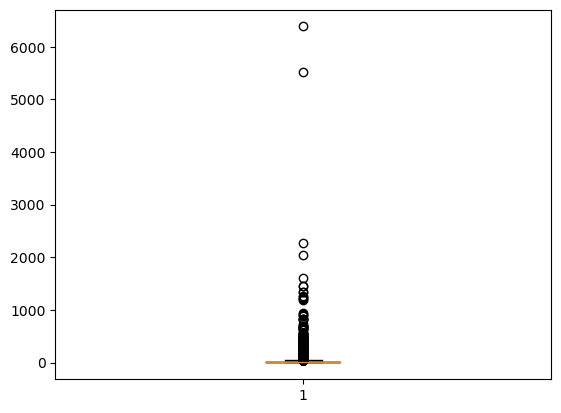

In [18]:
# Checking for outliers in AMT_ANNUITY before deciding on the imputation method (mean/median)

plt.boxplot(application_data['AMT_ANNUITY'].value_counts())
plt.show()

In [19]:
med = application_data['AMT_ANNUITY'].median()
application_data['AMT_ANNUITY'].fillna(med, inplace = True)

In [20]:
application_data['AMT_ANNUITY'].isnull().sum() # All the null values are removed

0

In [21]:
# Further searching for the column for null values
application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE             

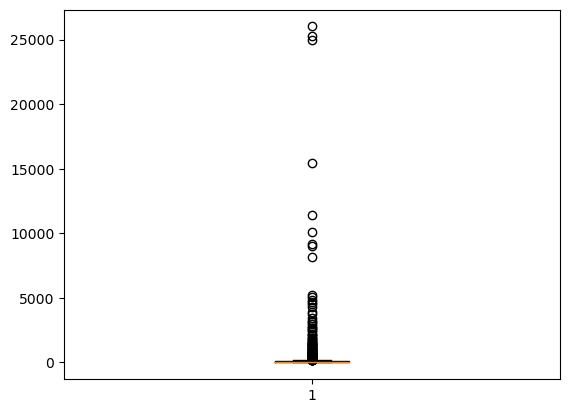

In [22]:
plt.boxplot(application_data['AMT_GOODS_PRICE'].value_counts())
plt.show()

In [23]:
# As 'AMT_GOODS_PRICE' is having outliers, we will impute the median value to the null values
med = application_data['AMT_GOODS_PRICE'].median()
application_data['AMT_GOODS_PRICE'].fillna(med, inplace = True)

In [24]:
application_data['AMT_GOODS_PRICE'].isnull().sum() # All the null values are removed

0

In [25]:
application_data['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [26]:
# Fixing Spouse, partner data into one 'Spouse'
application_data['NAME_TYPE_SUITE'] = application_data['NAME_TYPE_SUITE'].apply(
    lambda x: x.split(',')[0].strip() if isinstance(x, str) and ',' in x else x)

# Fixing Other_A, Other_B, Group of People into single category called 'Others'
application_data['NAME_TYPE_SUITE'] = application_data['NAME_TYPE_SUITE'].apply(lambda x: 'Others' if x in ['Other_A', 'Other_B', 'Group of people'] else x)

In [27]:
application_data['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied    248526
Family            40149
Spouse            11370
Children           3267
Others             2907
Name: count, dtype: int64

In [28]:
# Checking for the null values in the 'NAME_TYPE_SUITE' column
application_data['NAME_TYPE_SUITE'].isnull().sum()

1292

In [29]:
# As 'NAME_TYPE_SUITE' is a categorical column, we will impute the null values using mode

mod = application_data['NAME_TYPE_SUITE'].mode()[0]
application_data['NAME_TYPE_SUITE'].fillna(mod, inplace=True)

In [30]:
# Cross verifying the null values in 'NAME_TYPE_SUITE' after imputation has been done
application_data['NAME_TYPE_SUITE'].isnull().sum()

0

In [31]:
application_data['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

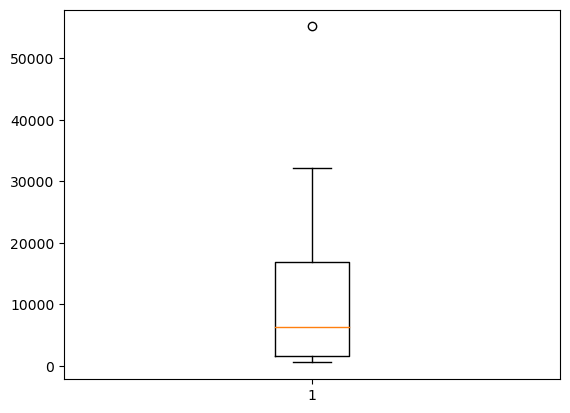

In [32]:
plt.boxplot(application_data['OCCUPATION_TYPE'].value_counts())
plt.show()

In [33]:
application_data['OCCUPATION_TYPE'].isnull().sum()

96391

In [34]:
# Creating a separate category 'No Occupation Data' in the 'OCCUPATION_TYPE' column.
# In other words, imputing these null values with a separate category called 'No Occupation Data'

application_data['OCCUPATION_TYPE'].fillna('No Occupation Data', inplace = True)

In [35]:
# Checking for the null values again after imputing the null values into a separate category
application_data['OCCUPATION_TYPE'].isnull().sum()

0

In [36]:
application_data['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
No Occupation Data       96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [37]:
application_data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
FLAG_MOBIL                    0
FLAG_EMP_PHONE                0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              0
FLAG_PHONE                    0
FLAG_EMAIL                    0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               2
ORGANIZATION_TYPE             0
dtype: int64

In [38]:
application_data['CNT_FAM_MEMBERS'].value_counts()

CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

In [39]:
# Removing of 2 null values in 'CNT_FAM_MEMBERS'

application_data = application_data.dropna(subset=['CNT_FAM_MEMBERS'], inplace=False) 

In [40]:
application_data.isnull().sum() # All the null values are removed now in the application_data

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
FLAG_MOBIL                    0
FLAG_EMP_PHONE                0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              0
FLAG_PHONE                    0
FLAG_EMAIL                    0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
ORGANIZATION_TYPE             0
dtype: int64

In [41]:
# Conversion of 'CNT_FAM_MEMBERS' column datatype into int

application_data['CNT_FAM_MEMBERS'] = application_data['CNT_FAM_MEMBERS'].astype(int)
application_data['CNT_FAM_MEMBERS'].value_counts()

CNT_FAM_MEMBERS
2     158357
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
14         2
12         2
20         2
16         2
13         1
15         1
11         1
Name: count, dtype: int64

In [42]:
application_data['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29277
Name: count, dtype: int64

In [43]:
application_data['CODE_GENDER'].value_counts()

CODE_GENDER
F      202447
M      105058
XNA         4
Name: count, dtype: int64

In [44]:
# Replacing all the 'XNA' with 'F'

application_data.loc[application_data.CODE_GENDER == 'XNA', 'CODE_GENDER'] = 'F'

In [45]:
application_data['CODE_GENDER'].value_counts()

CODE_GENDER
F    202451
M    105058
Name: count, dtype: int64

In [46]:
application_data['ORGANIZATION_TYPE'].value_counts().sum() # 307509
application_data['ORGANIZATION_TYPE'].value_counts(ascending = False)

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

'ORGANIZATION_TYPE' column has total 307509 rows out of which 55374 rows are having 'XNA' values which means 18% of the column is having this values. Hence if we drop the 55374 rows, it will not have any major impact on our dataset.

In [47]:
# Dropping all the rows having 'XNA' values in the 'ORGANIZATION_TYPE' column

application_data = application_data[application_data['ORGANIZATION_TYPE'] != 'XNA']
application_data['ORGANIZATION_TYPE'].value_counts().sum() # 55374 rows are dropped

252135

There's lot of irregularity in the data, like Trade : Type 4, Type 4 which can be clubbed into one category : Trade

In [48]:
# Merging the different types into single category for easier analysis (The type does not give any info)
application_data['ORGANIZATION_TYPE'] = application_data['ORGANIZATION_TYPE'].apply(lambda x: x.split(':')[0].strip() if ':' in x else x)

#Need to fix the Business Entity now.
application_data['ORGANIZATION_TYPE'] = application_data['ORGANIZATION_TYPE'].apply(lambda x: " ".join(x.split()[:x.split().index("Type")]) if 'Business Entity' in x else x)

In [49]:
# Defining a lambda function here to categorize organizations
categorize = lambda org: "Others" if org in ("Business Entity", "Other") else org

# Applying that lambda function to the ORGANIZATION_TYPE list
application_data["ORGANIZATION_TYPE"] = list(map(categorize, application_data["ORGANIZATION_TYPE"]))

In [50]:
application_data['ORGANIZATION_TYPE'].value_counts(ascending = False)

ORGANIZATION_TYPE
Others                 101211
Self-employed           38412
Trade                   14315
Industry                14311
Medicine                11193
Government              10404
Transport                8990
School                   8893
Kindergarten             6880
Construction             6721
Security                 3247
Housing                  2958
Military                 2634
Bank                     2507
Agriculture              2454
Police                   2341
Postal                   2157
Security Ministries      1974
Restaurant               1811
Services                 1575
University               1327
Hotel                     966
Electricity               950
Insurance                 596
Telecom                   577
Emergency                 560
Advertising               429
Realtor                   396
Culture                   379
Mobile                    317
Legal Services            305
Cleaning                  260
Religion              

In [51]:
application_data['AMT_INCOME_TOTAL'] = application_data['AMT_INCOME_TOTAL'].astype(int)
application_data['AMT_CREDIT'] = application_data['AMT_CREDIT'].astype(int)
application_data['AMT_GOODS_PRICE'] = application_data['AMT_GOODS_PRICE'].astype(int)
application_data['AMT_ANNUNITY'] = application_data['AMT_GOODS_PRICE'].astype(int)

In [52]:
# Checking for the min and max values to create bins

print(application_data['AMT_INCOME_TOTAL'].min())
print(application_data['AMT_INCOME_TOTAL'].max())

25650
117000000


In [53]:
# Checking for the min and max values to create bins

print(application_data['AMT_CREDIT'].min())
print(application_data['AMT_CREDIT'].max())

45000
4050000


In [54]:
# Checking for the min and max values to create bins

print(application_data['AMT_GOODS_PRICE'].min())
print(application_data['AMT_GOODS_PRICE'].max())

40500
4050000


In [55]:
# Checking for the min and max values to create bins

print(application_data['AMT_ANNUITY'].min())
print(application_data['AMT_ANNUITY'].max())

application_data['AMT_ANNUITY'] = application_data['AMT_ANNUITY'].astype(int)

1980.0
258025.5


In [56]:
# Creating bins for Income of the client

bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000]
group = ['0-50K', '50K-100K','100K-150K', '150K-200K','200K-250K','250K-300K',
         '300K-350K','350K-400K','400K-450K','450K-500K','500K and above']

application_data['AMT_INCOME_GROUP']=pd.cut(application_data['AMT_INCOME_TOTAL'], bins = bins, labels = group)

# Creating bins for credit amount of the loan

bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000]
group = ['0-50K', '50K-100K','100K-150K', '150K-200K','200K-250K','250K-300K',
         '300K-350K','350K-400K','400K-450K','450K-500K','500K and above']

application_data['AMT_CREDIT_GROUP']=pd.cut(application_data['AMT_CREDIT'],bins = bins,labels = group)

# Creating bins for goods price for which loan has been taken

bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000]
group = ['0-50K', '50K-100K','100K-150K', '150K-200K','200K-250K','250K-300K',
         '300K-350K','350K-400K','400K-450K','450K-500K','500K and above']

application_data['GOODS_PRICE_GROUP']=pd.cut(application_data['AMT_GOODS_PRICE'],bins = bins,labels = group)

# Creating bins for annunity amount of the loan

bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,200000]
group = ['0-10K', '10K-20K', '20K-30K', '30K-40K','40K-50K','50K-60K', '60K-70K','70K-80K'
        '80K-90K','90K-100K','100K-200K','200K &  above']

application_data['AMT_ANNUITY_GROUP']=pd.cut(application_data['AMT_ANNUITY'],bins = bins,labels = group)

In [57]:
application_data['AMT_INCOME_GROUP'].value_counts()

AMT_INCOME_GROUP
100K-150K         74670
150K-200K         55188
200K-250K         42476
50K-100K          41689
250K-300K         15234
300K-350K          8121
350K-400K          5317
400K-450K          4514
500K and above     2543
0-50K              1982
450K-500K           401
Name: count, dtype: int64

In [58]:
application_data['AMT_CREDIT_GROUP'].value_counts()

AMT_CREDIT_GROUP
500K and above    132309
250K-300K          24961
200K-250K          17502
400K-450K          15854
150K-200K          14867
300K-350K          13487
450K-500K          11254
100K-150K           9234
350K-400K           8399
50K-100K            3885
0-50K                383
Name: count, dtype: int64

In [59]:
application_data['GOODS_PRICE_GROUP'].value_counts()

GOODS_PRICE_GROUP
500K and above    104435
200K-250K          32887
400K-450K          29130
450K-500K          18931
250K-300K          16585
150K-200K          14187
100K-150K          12093
300K-350K           9865
350K-400K           7636
50K-100K            5435
0-50K                951
Name: count, dtype: int64

In [60]:
application_data['AMT_ANNUITY_GROUP'].value_counts()

AMT_ANNUITY_GROUP
20K-30K           75644
10K-20K           63656
30K-40K           51021
40K-50K           24902
0-10K             18060
50K-60K           11681
60K-70K            4455
70K-80K80K-90K     1383
90K-100K            542
200K &  above       397
100K-200K           361
Name: count, dtype: int64

In [61]:
application_data['AMT_ANNUITY_GROUP'].isnull().sum()

33

In [62]:
# Dropping all the null values in the AMT_ANNUITY_GROUP column

application_data = application_data.dropna(subset=['AMT_ANNUITY_GROUP'])

# Checking for remaining null values
application_data['AMT_ANNUITY_GROUP'].isnull().sum()

0

In [63]:
application_data[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0       -9461           -637            -3648.0            -2120
1      -16765          -1188            -1186.0             -291
2      -19046           -225            -4260.0            -2531
3      -19005          -3039            -9833.0            -2437
4      -19932          -3038            -4311.0            -3458

In [64]:
def days_to_years(dataset, cols):
    dataset[cols] = dataset[cols].abs().div(365).astype(int)
    return dataset

# Listing of the columns to convert
columns = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

# Applying the conversion function
application_data = days_to_years(application_data, columns)

In [65]:
application_data[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0          25              1                  9                5
1          45              3                  3                0
2          52              0                 11                6
3          52              8                 26                6
4          54              8                 11                9

In [66]:
#Creating the buckets of <30, 30-40, 40-50, 50-60, 60+ for Age of the Client.
application_data['AGE_GROUP'] = pd.cut(application_data.DAYS_BIRTH, [0, 30, 40, 50, 60, 9999], labels = ['<30', '30-40', '40-50', '50-60','60+'])
application_data['AGE_GROUP'].value_counts()

AGE_GROUP
30-40    82540
40-50    72170
<30      52631
50-60    40282
60+       4479
Name: count, dtype: int64

In [67]:
# Check for the percentage of missing values in all the columns in previous_application

100*previous_application[['AMT_GOODS_PRICE', 'AMT_CREDIT', 'NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS']].isnull().mean() 

AMT_GOODS_PRICE         23.081773
AMT_CREDIT               0.000060
NAME_CONTRACT_TYPE       0.000000
NAME_CONTRACT_STATUS     0.000000
dtype: float64

In [68]:
previous_application.shape

(1670214, 37)

In [69]:
previous_application[['AMT_GOODS_PRICE', 'AMT_CREDIT', 'NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS']].dtypes

AMT_GOODS_PRICE         float64
AMT_CREDIT              float64
NAME_CONTRACT_TYPE       object
NAME_CONTRACT_STATUS     object
dtype: object

In [70]:
previous_application['AMT_GOODS_PRICE'].value_counts().sum()

1284699

As 23% of the value in the AMT_GOODS_PRICE is null, we can drop these rows as this will not affect our analysis
We can also convert the float datatype into integer for the AMT_GOODS_PRICE, AMT_CREDIT column

In [71]:
# Dropping all the null values in the AMT_GOODS_PRICE column

previous_application = previous_application.dropna(subset=['AMT_GOODS_PRICE'])

# Checking for remaining null values
previous_application['AMT_GOODS_PRICE'].isnull().sum()

0

In [72]:
100*previous_application[['AMT_APPLICATION','AMT_GOODS_PRICE', 'AMT_CREDIT', 'NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS']].isnull().mean() 

AMT_APPLICATION         0.0
AMT_GOODS_PRICE         0.0
AMT_CREDIT              0.0
NAME_CONTRACT_TYPE      0.0
NAME_CONTRACT_STATUS    0.0
dtype: float64

In [73]:
# Conversion of AMT_APPLICATION, AMT_GOODS_PRICE & AMT_CREDIT into integer
previous_application['AMT_GOODS_PRICE'] = previous_application['AMT_GOODS_PRICE'].astype(int)
previous_application['AMT_CREDIT'] = previous_application['AMT_CREDIT'].astype(int)
previous_application['AMT_APPLICATION'] = previous_application['AMT_APPLICATION'].astype(int)
previous_application['AMT_APPLICATION'] = previous_application['AMT_APPLICATION'].astype(int)

In [74]:
previous_application[['AMT_APPLICATION','AMT_GOODS_PRICE', 'AMT_CREDIT', 'NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS']].dtypes

AMT_APPLICATION          int32
AMT_GOODS_PRICE          int32
AMT_CREDIT               int32
NAME_CONTRACT_TYPE      object
NAME_CONTRACT_STATUS    object
dtype: object

In [75]:
# Creating bins for credit amount of the loan in previous_application dataset

bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000]
group = ['0-50K', '50K-100K','100K-150K', '150K-200K','200K-250K','250K-300K',
         '300K-350K','350K-400K','400K-450K','450K-500K','500K and above']

previous_application['AMT_CREDIT_GROUP']=pd.cut(previous_application['AMT_CREDIT'],bins = bins,labels = group)

# Creating bins for goods price for which loan has been taken in previous_application dataset

bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000]
group = ['0-50K', '50K-100K','100K-150K', '150K-200K','200K-250K','250K-300K',
         '300K-350K','350K-400K','400K-450K','450K-500K','500K and above']

previous_application['GOODS_PRICE_GROUP']=pd.cut(previous_application['AMT_GOODS_PRICE'],bins = bins,labels = group)

# Creating bins for annunity amount of the loan in previous_application dataset

bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,200000]
group = ['0-10K', '10K-20K', '20K-30K', '30K-40K','40K-50K','50K-60K', '60K-70K','70K-80K'
        '80K-90K','90K-100K','100K-200K','200K &  above']

previous_application['AMT_ANNUITY_GROUP']=pd.cut(previous_application['AMT_ANNUITY'],bins = bins,labels = group)

# Creating bins for loan application amount in previous_application dataset

bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,200000]
group = ['0-10K', '10K-20K', '20K-30K', '30K-40K','40K-50K','50K-60K', '60K-70K','70K-80K'
        '80K-90K','90K-100K','100K-200K','200K &  above']

previous_application['AMT_APPLICATION_GROUP']=pd.cut(previous_application['AMT_APPLICATION'],bins = bins,labels = group)

In [76]:
previous_application['AMT_CREDIT_GROUP'].value_counts()

AMT_CREDIT_GROUP
0-50K             316664
50K-100K          272921
100K-150K         179982
500K and above    176455
150K-200K          98164
200K-250K          74635
250K-300K          56058
300K-350K          30847
400K-450K          30053
350K-400K          24097
450K-500K          22094
Name: count, dtype: int64

In [77]:
previous_application['GOODS_PRICE_GROUP'].value_counts()

GOODS_PRICE_GROUP
0-50K             310204
50K-100K          285457
100K-150K         191252
500K and above    146339
200K-250K          93844
150K-200K          90725
400K-450K          51597
250K-300K          38742
300K-350K          31582
350K-400K          19605
450K-500K          18483
Name: count, dtype: int64

In [78]:
previous_application['AMT_ANNUITY_GROUP'].value_counts()

AMT_ANNUITY_GROUP
0-10K             548632
10K-20K           371459
20K-30K           159308
30K-40K            73731
40K-50K            45071
50K-60K            23435
60K-70K            10552
70K-80K80K-90K      5565
90K-100K            2734
200K &  above       2616
100K-200K           1666
Name: count, dtype: int64

In [79]:
previous_application.AMT_DOWN_PAYMENT.isnull().sum()

510329

In [80]:
# Verifying the null values in the application_data after data cleaning has been done
application_data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
FLAG_MOBIL                    0
FLAG_EMP_PHONE                0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              0
FLAG_PHONE                    0
FLAG_EMAIL                    0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
ORGANIZATION_TYPE             0
AMT_ANNUNITY                  0
AMT_INCO

UNIVARIATE ANALYSIS ON CATEGORICAL ORDERED & UNORDERED VARIABLES - NAME_CONTRACT_TYPE, CODE_GENDER, 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'AMT_INCOME_GROUP', 'AMT_CREDIT_GROUP'

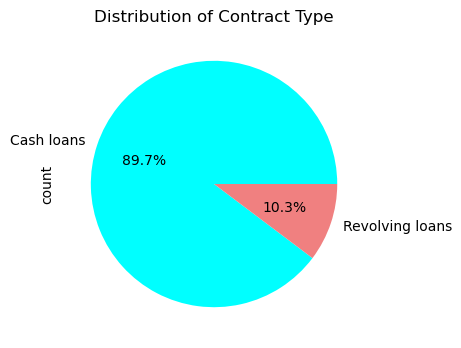

In [81]:
# UNIVARIATE ANALYSIS ON NAME_CONTRACT_TYPE
plt.figure(figsize=(6,4))
application_data['NAME_CONTRACT_TYPE'].value_counts().plot.pie(autopct="%1.1f%%", colors = ['cyan', 'lightcoral'])
plt.title('Distribution of Contract Type')
plt.show()

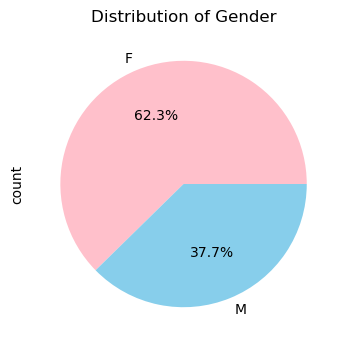

In [82]:
# UNIVARIATE ANALYSIS ON CODE_GENDER
plt.figure(figsize=(6,4))
application_data['CODE_GENDER'].value_counts().plot.pie(autopct="%1.1f%%", colors = ['pink', 'skyblue'])
plt.title('Distribution of Gender')
plt.show()

In [83]:
# USER DEFINED FUNCTION FOR PERFORMING UNIVARIATE ANALYSIS ON CATEGORICAL VARIABLES USING BAR PLOT

def categorical_cols(cols, title):
    plt.figure(figsize=(6,4))
    value_counts = application_data[cols].value_counts(normalize=True)
    ax = value_counts.plot.barh(color = 'darkblue', edgecolor = 'yellow')
    plt.title(title)
    
    # Annotating each bar with its percentage value
    
    for i, v in enumerate(value_counts):
        ax.text(v + 0.005, i, f'{v*100:.2f}%', va='center')
        
    plt.show()

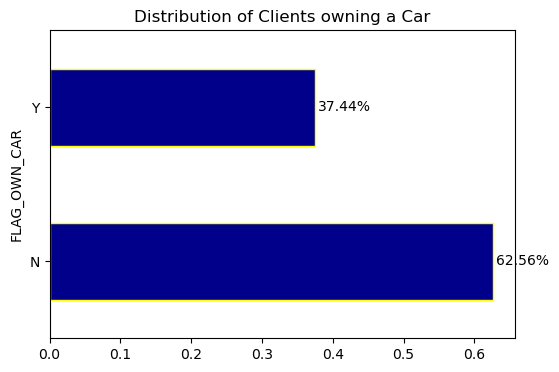

In [84]:
# UNIVARIATE ANALYSIS ON FLAG_OWN_CAR
categorical_cols('FLAG_OWN_CAR', 'Distribution of Clients owning a Car')

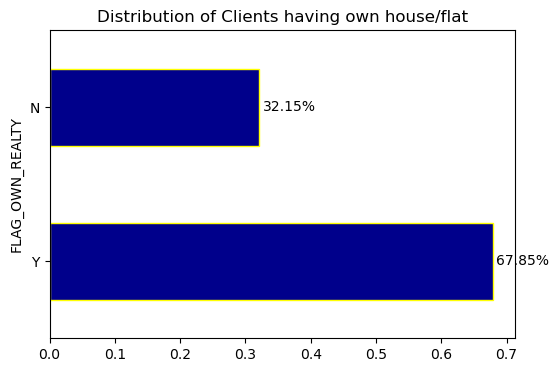

In [85]:
# UNIVARIATE ANALYSIS ON FLAG_OWN_REALTY
categorical_cols('FLAG_OWN_REALTY', 'Distribution of Clients having own house/flat')

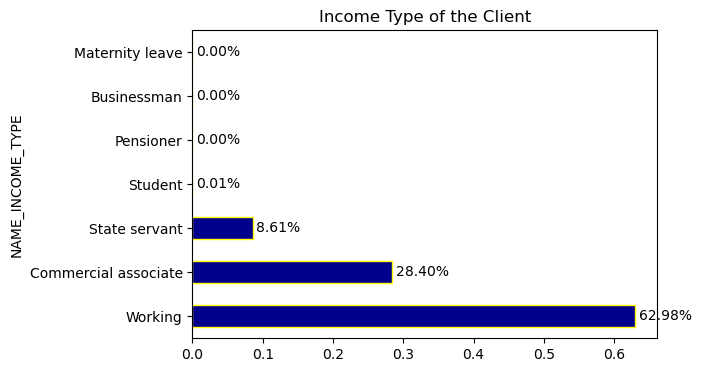

In [86]:
# UNIVARIATE ANALYSIS ON NAME_INCOME_TYPE
categorical_cols('NAME_INCOME_TYPE', 'Income Type of the Client')

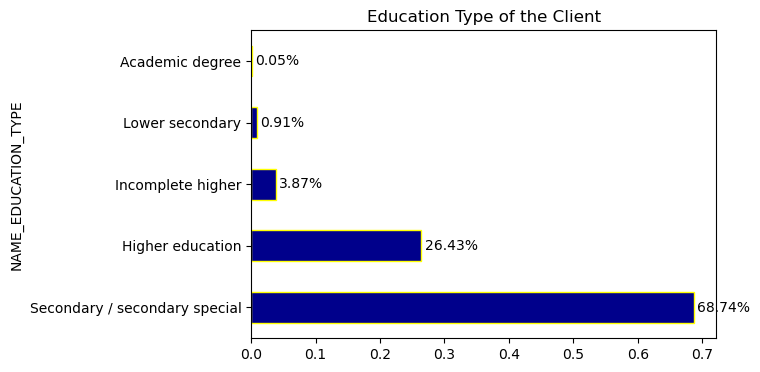

In [87]:
# UNIVARIATE ANALYSIS ON NAME_EDUCATION_TYPE
categorical_cols('NAME_EDUCATION_TYPE', 'Education Type of the Client')

People with secondary eductaion has the highest application rate and academic degree has the lowest application rate

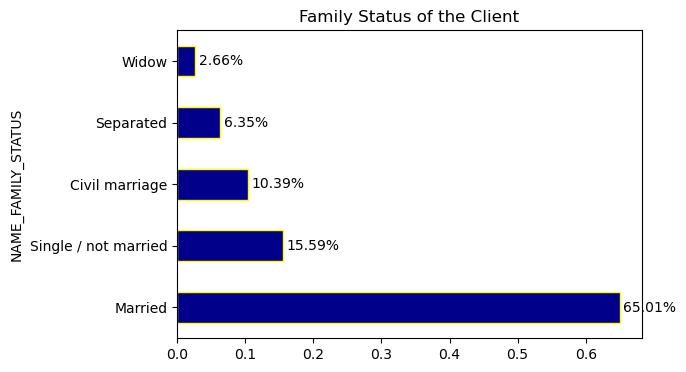

In [88]:
# UNIVARIATE ANALYSIS ON NAME_FAMILY_STATUS
categorical_cols('NAME_FAMILY_STATUS', 'Family Status of the Client')

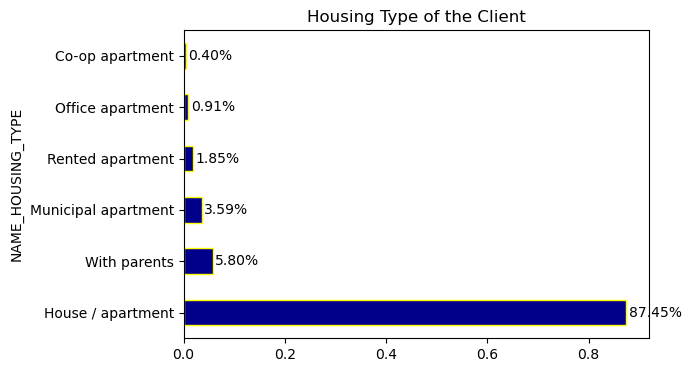

In [89]:
# UNIVARIATE ANALYSIS ON NAME_HOUSING_TYPE
categorical_cols('NAME_HOUSING_TYPE', 'Housing Type of the Client')

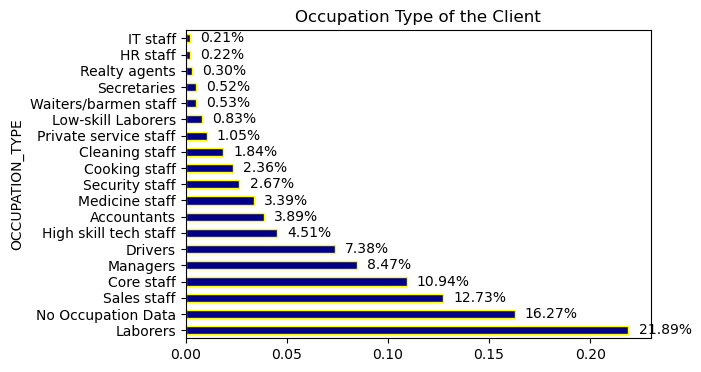

In [90]:
# UNIVARIATE ANALYSIS ON OCCUPATION_TYPE
categorical_cols('OCCUPATION_TYPE', 'Occupation Type of the Client')

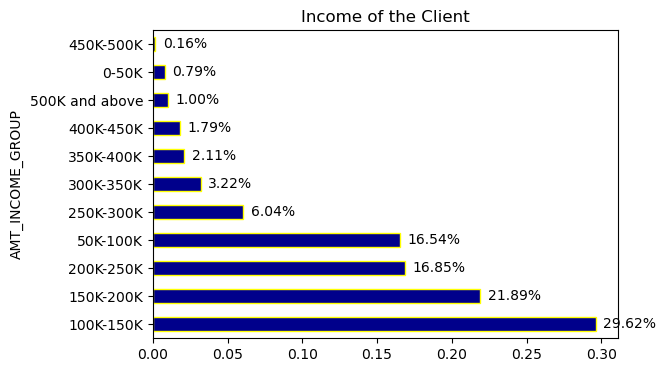

AMT_INCOME_GROUP
100K-150K         74670
150K-200K         55188
200K-250K         42475
50K-100K          41689
250K-300K         15233
300K-350K          8121
350K-400K          5317
400K-450K          4509
500K and above     2517
0-50K              1982
450K-500K           401
Name: count, dtype: int64


In [91]:
# UNIVARIATE ANALYSIS ON AMT_INCOME_GROUP
categorical_cols('AMT_INCOME_GROUP', 'Income of the Client')
print(application_data['AMT_INCOME_GROUP'].value_counts())

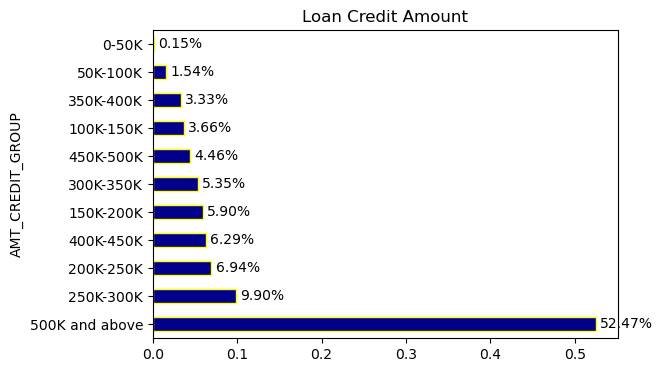

In [92]:
# UNIVARIATE ANALYSIS ON AMT_CREDIT_GROUP
categorical_cols('AMT_CREDIT_GROUP', 'Loan Credit Amount')

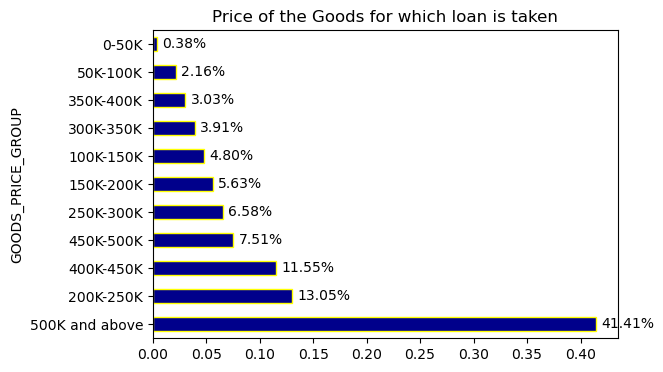

In [93]:
# UNIVARIATE ANALYSIS ON GOODS_PRICE_GROUP
categorical_cols('GOODS_PRICE_GROUP', 'Price of the Goods for which loan is taken')

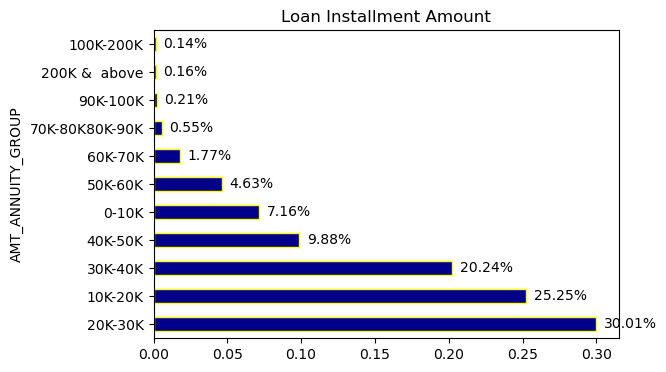

In [94]:
# UNIVARIATE ANALYSIS ON AMT_ANNUITY_GROUP
categorical_cols('AMT_ANNUITY_GROUP', 'Loan Installment Amount')

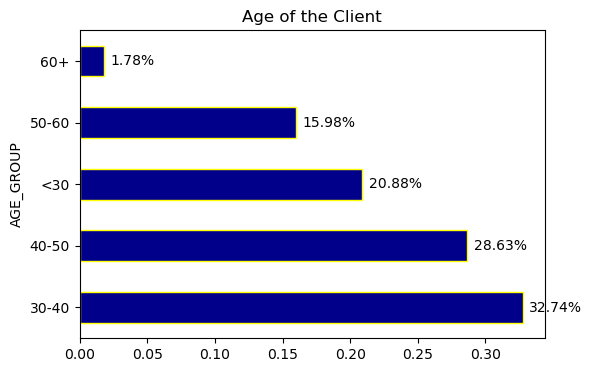

In [95]:
# UNIVARIATE ANALYSIS ON AGE_GROUP
categorical_cols('AGE_GROUP', 'Age of the Client')

In [96]:
100*application_data['TARGET'].value_counts(normalize = True)

TARGET
0    91.338823
1     8.661177
Name: proportion, dtype: float64

In [97]:
# Imbalance Ratio

target0 = application_data.loc[application_data["TARGET"]==0]
target1 = application_data.loc[application_data["TARGET"]==1]

round(len(target0)/len(target1),2)

10.55

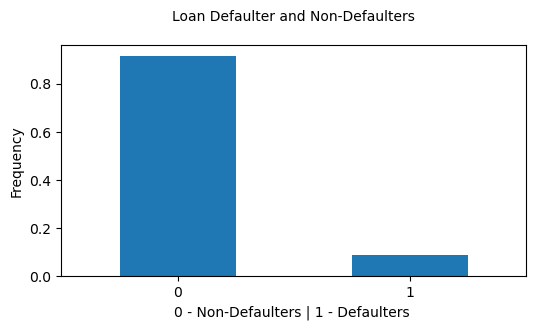

In [98]:
plt.figure(figsize=[6,3])
application_data.TARGET.value_counts(normalize=True).plot.bar()

plt.title('Loan Defaulter and Non-Defaulters\n', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('0 - Non-Defaulters | 1 - Defaulters ', fontsize=10)
plt.xticks(fontsize=10, rotation = None)
plt.yticks(fontsize = 10)
plt.show()

In [99]:
# Divide the dataset into two set - Target-1 and Target-0 due to data imbalance

non_defaulter_data = application_data[application_data['TARGET']==0]
defaulter_data  = application_data[application_data['TARGET']==1]

In [100]:
print(non_defaulter_data.shape)
print(defaulter_data.shape)

(230267, 36)
(21835, 36)


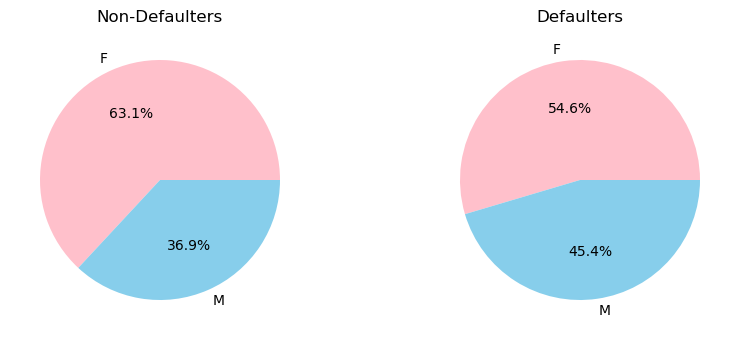

In [101]:
plt.figure(figsize=(9, 6))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4)

non_defaulter_total = non_defaulter_data['CODE_GENDER'].sum()
defaulter_total = defaulter_data['CODE_GENDER'].sum()

# Non-defaulters pie chart
plt.subplot(1, 2, 1)
non_defaulter_counts = non_defaulter_data['CODE_GENDER'].value_counts().sort_values(ascending=False)
plt.pie(non_defaulter_counts, labels=non_defaulter_counts.index, autopct="%1.1f%%", colors = ['pink', 'skyblue'])
plt.title('Non-Defaulters')

# Defaulters pie chart
plt.subplot(1, 2, 2)
defaulter_counts = defaulter_data['CODE_GENDER'].value_counts().sort_values(ascending=False)
plt.pie(defaulter_counts, labels=defaulter_counts.index, autopct="%1.1f%%", colors = ['pink', 'skyblue'])
plt.title('Defaulters')

plt.show()

AS I WILL BE PERFORMING MOST OF THE SEGMENTED UNIVARIATE ANALYSIS THROUGH THIS BARPLOT, I AM DEFINING A USER DEFINED FUNCTION WHICH WILL JUST TAKE THE COLUMN NAME AND CREATE THE BARPLOT FOR BOTH NON-DEFAULTER AND DEFAULTER TARGET VARIABLE

In [102]:
def create_barplots(nondef_col, def_col):
    plt.figure(figsize=[12, 4])
    plt.subplots_adjust(wspace=1)

    plt.subplot(1, 2, 1) # 1st plot for non-defaulters
    ax1 = sns.barplot(x=nondef_col.value_counts(normalize=True).values, y=nondef_col.value_counts().index, palette="Oranges")
    plt.title('Non-Defaulters')
    ax1.tick_params(axis='y', labelsize=8)  # font size for y-axis in 1st plot

    plt.subplot(1, 2, 2) # 2nd plot for defaulters
    ax2 = sns.barplot(x=def_col.value_counts(normalize=True).values, y=def_col.value_counts().index, palette="cool")
    plt.title('Defaulters')
    ax2.tick_params(axis='y', labelsize=8)  # font size for y-axis in 2nd plot

    plt.show()

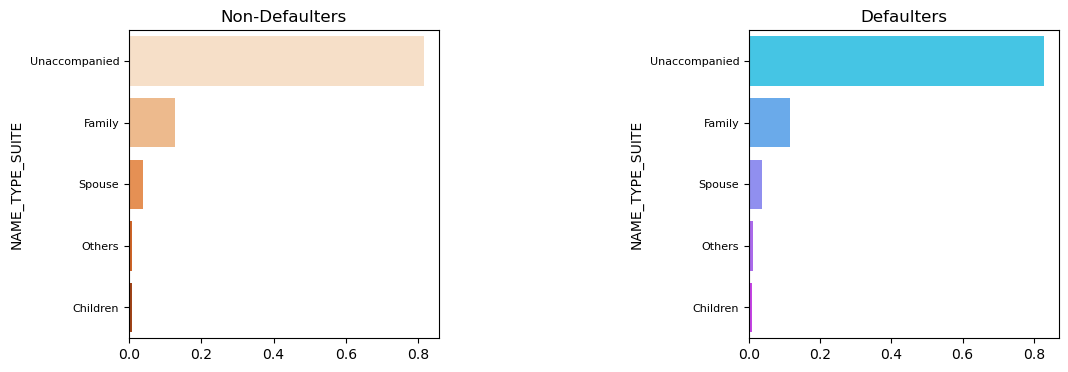

In [103]:
# UNIVARIATE ANALYSIS FOR NAME_TYPE_SUITE COLUMN
create_barplots(non_defaulter_data['NAME_TYPE_SUITE'], defaulter_data['NAME_TYPE_SUITE'])

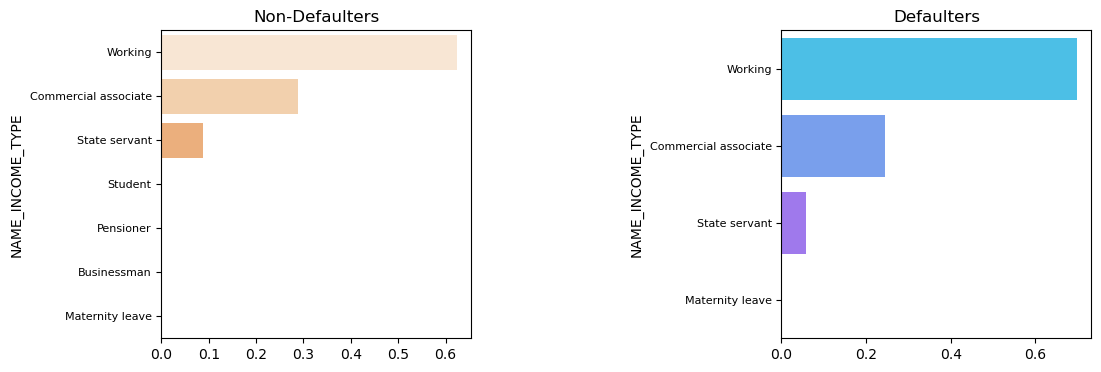

In [104]:
# UNIVARIATE ANALYSIS FOR NAME_INCOME_TYPE COLUMN
create_barplots(non_defaulter_data['NAME_INCOME_TYPE'], defaulter_data['NAME_INCOME_TYPE'])

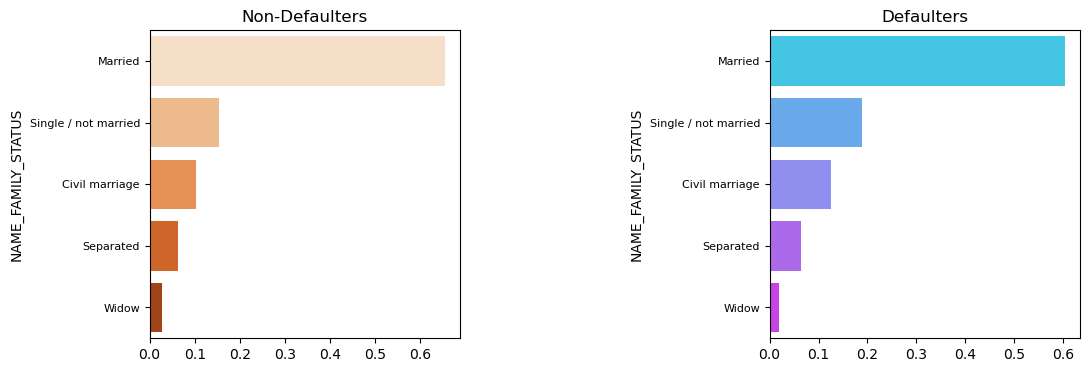

In [105]:
# UNIVARIATE ANALYSIS ON NAME_FAMILY_STATUS COLUMN
create_barplots(non_defaulter_data['NAME_FAMILY_STATUS'], defaulter_data['NAME_FAMILY_STATUS'])

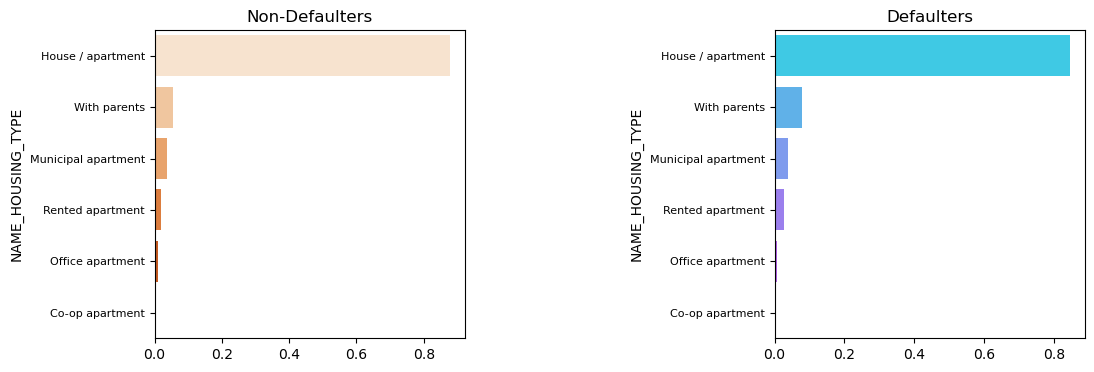

In [106]:
# UNIVARIATE ANALYSIS ON NAME_HOUSING_TYPE COLUMN
create_barplots(non_defaulter_data['NAME_HOUSING_TYPE'], defaulter_data['NAME_HOUSING_TYPE'])

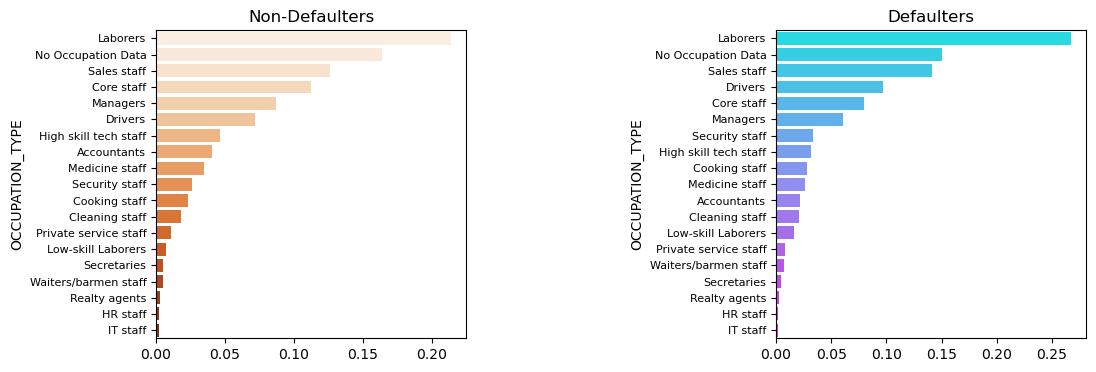

In [107]:
# UNIVARIATE ANALYSIS ON OCCUPATION_TYPE COLUMN
create_barplots(non_defaulter_data['OCCUPATION_TYPE'], defaulter_data['OCCUPATION_TYPE'])

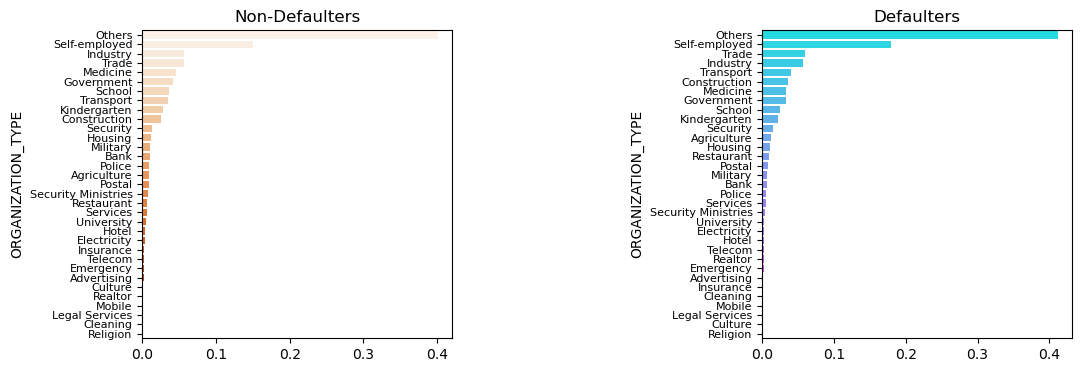

In [108]:
# UNIVARIATE ANALYSIS ON ORGANIZATION_TYPE COLUMN
create_barplots(non_defaulter_data['ORGANIZATION_TYPE'], defaulter_data['ORGANIZATION_TYPE'])

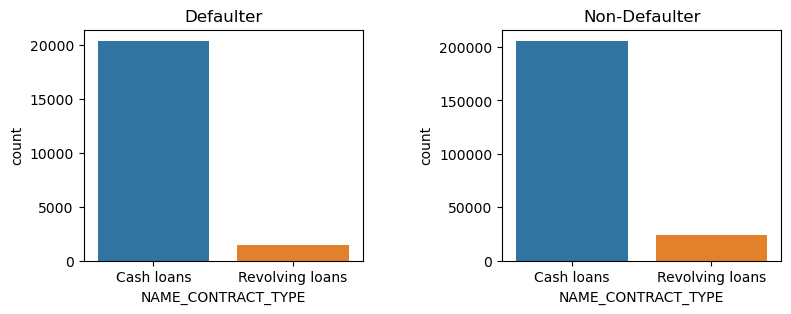

In [109]:
plt.figure(figsize = [9,3])

plt.subplot(1, 2, 1)
sns.countplot(x = "NAME_CONTRACT_TYPE", data = defaulter_data)
plt.title("Defaulter")

plt.subplot(1, 2, 2)
sns.countplot(x = "NAME_CONTRACT_TYPE", data = non_defaulter_data)
plt.title("Non-Defaulter")

plt.subplots_adjust(wspace = 0.5)
plt.show()

In [110]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0            202500      406597        24700   
1               N             0            270000     1293502        35698   
2               Y             0             67500      135000         6750   
3               Y             0            135000      312682        29686   
4               Y             0            121500      513000        21865   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0           351000   Unaccompanied          Working   
1          1129500          Family    State servant   
2           135000   Unaccompanied          Working   
3           297000   Unaccompanied          Working   
4           513000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25              1                  9   
1                    0.003541          45              3                  3   
2                    0.010032          52              0                 11   
3                    0.008019          52              8                 26   
4                    0.028663          54              8                 11   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0                5           1               1                0   
1                0           1               1                0   
2                6           1               1                1   
3                6           1               1                0   
4                9           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   

  ORGANIZATION_TYPE  AMT_ANNUNITY AMT_INCOME_GROUP AMT_CREDIT_GROUP  \
0            Others        351000        200K-250K        400K-450K   
1            School       1129500        250K-300K   500K and above   
2        Government        135000         50K-100K        100K-150K   
3            Others        297000        100K-150K        300K-350K   
4          Religion        513000        100K-150K   500K and above   

  GOODS_PRICE_GROUP AMT_ANNUITY_GROUP AGE_GROUP  
0         350K-400K           20K-30K       <30  
1    500K and above           30K-40K     40-50  
2         100K-150K             0-10K     50-60  
3         250K-300K           20K-30K     50-60  
4    500K and above           20K-30K     50-60

In [111]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
       'AMT_ANNUNITY', 'AMT_INCOME_GROUP', 'AMT_CREDIT_GROUP',
       'GOODS_PRICE_GROUP', 'AMT_ANNUITY_GROUP', 'AGE_GROUP'],
      dtype='object')

In [112]:
# USER DEFINED FUNCTION TO CREATE COUNTPLOTS FOR CATEGORICAL ORDERED VARIABLES

def create_countplots(nondef_col, def_col):
    
    plt.figure(figsize = [12, 4])

    plt.subplot(1, 2, 1)
    plot1 = sns.countplot(y = nondef_col, data = non_defaulter_data, palette="winter")
    plt.title('Non-Defaulters')
    plt.xticks(rotation = 90)
    plot1.tick_params(axis='y', labelsize=10)  # font size for y-axis in 1st plot

    plt.subplot(1, 2, 2)
    plot2 = sns.countplot(y = def_col, data = defaulter_data, palette="summer")
    plt.title("Defaulter")
    plt.xticks(rotation = 90)
    plot2.tick_params(axis='y', labelsize=10)  # font size for y-axis in 1st plot

    plt.subplots_adjust(wspace = 1)
    plt.show()

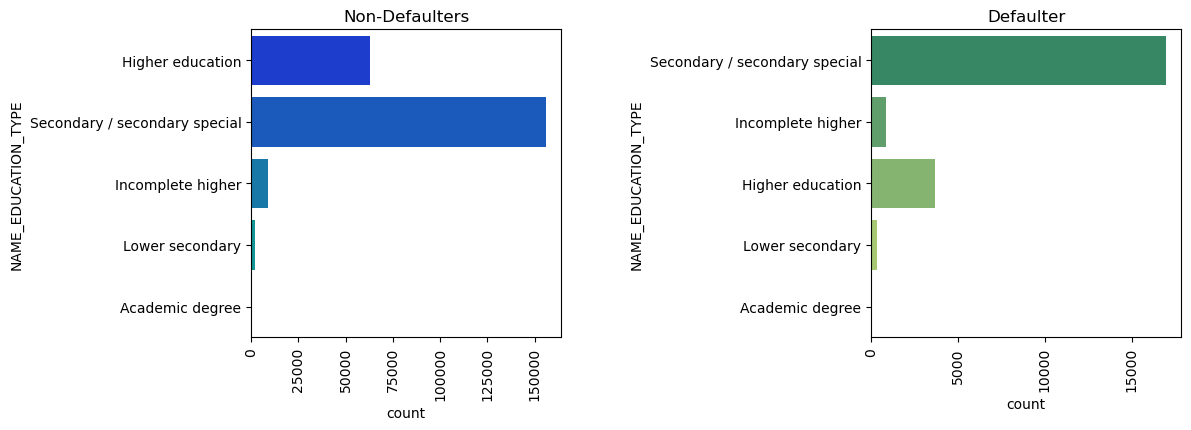

In [113]:
# UNIVARIATE ANALYSIS FOR NAME_EDUCATION_TYPE
create_countplots(non_defaulter_data['NAME_EDUCATION_TYPE'], defaulter_data['NAME_EDUCATION_TYPE'])

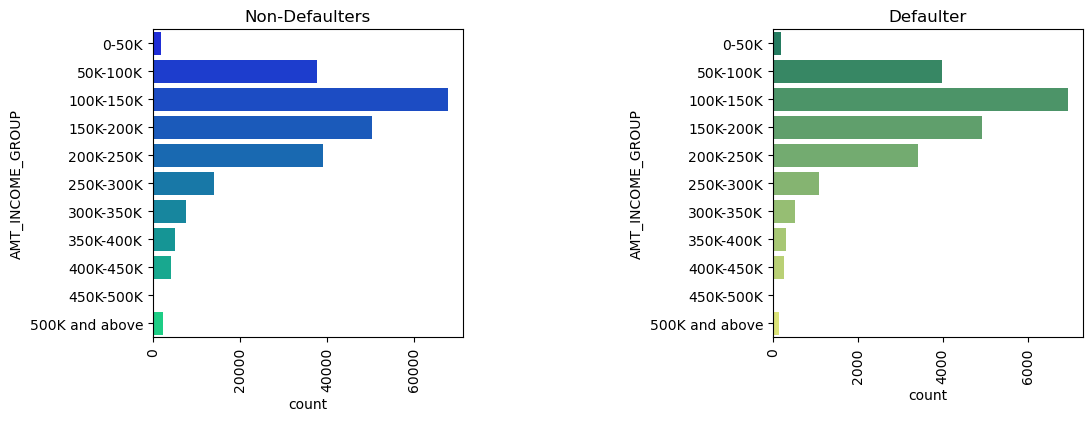

In [114]:
# UNIVARIATE ANALYSIS FOR AMT_INCOME_GROUP
create_countplots(non_defaulter_data['AMT_INCOME_GROUP'], defaulter_data['AMT_INCOME_GROUP'])

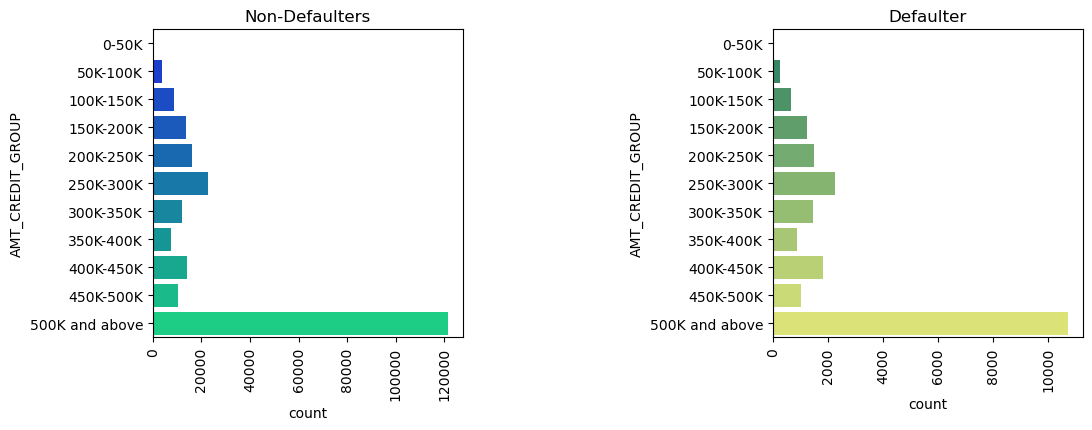

In [115]:
# UNIVARIATE ANALYSIS FOR AMT_CREDIT_GROUP
create_countplots(non_defaulter_data['AMT_CREDIT_GROUP'], defaulter_data['AMT_CREDIT_GROUP'])

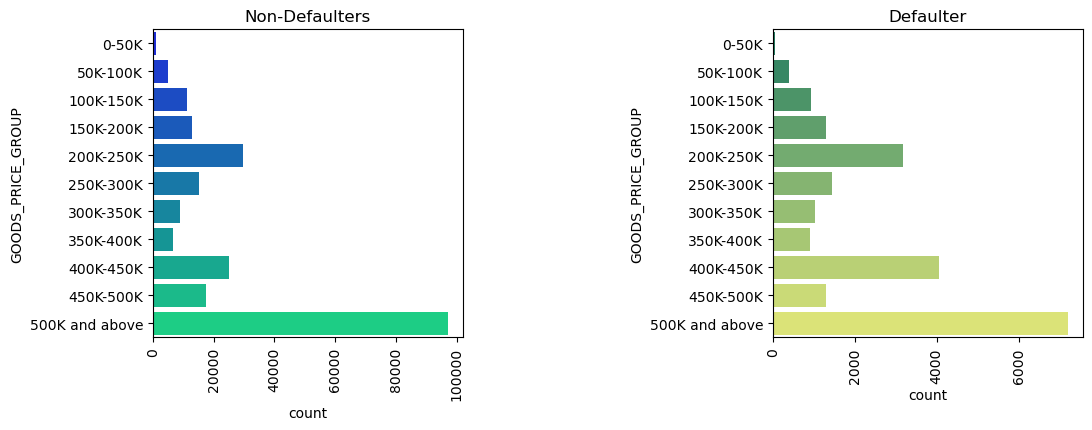

In [116]:
# UNIVARIATE ANALYSIS FOR GOODS_PRICE_GROUP
create_countplots(non_defaulter_data['GOODS_PRICE_GROUP'], defaulter_data['GOODS_PRICE_GROUP'])

Majority of the people have applied/received an loan amount of 9 Lacs and above

In [117]:
# USER DEFINED FUNCTION FOR UNIVARIATE ANALYSIS OF THE NUMERICAL COLUMNS USING LINEPLOT
def create_hist(nondef_col, def_col, bins, xlabel, ylabel):
    plt.figure(figsize=[12, 4])

    plt.subplot(1, 2, 1)
    plt.hist(nondef_col, bins = bins, color='#BDB7B5', edgecolor='black')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title('Non-Defaulters')

    plt.subplot(1, 2, 2)
    plt.hist(def_col, bins = bins, color='#F0E68C', edgecolor='black')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title("Defaulter")
    
    plt.xticks(fontsize=10) 
    plt.yticks(fontsize=10)
    
    plt.subplots_adjust(wspace=0.5)
    plt.show()

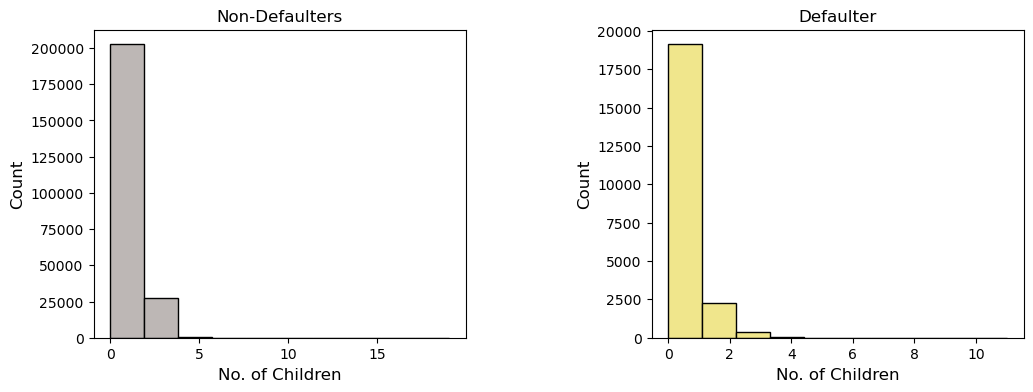

In [118]:
# UNIVARIATE ANALYSIS FOR CNT_CHILDREN COLUMN
create_hist(non_defaulter_data['CNT_CHILDREN'], defaulter_data['CNT_CHILDREN'], None, 'No. of Children', 'Count')

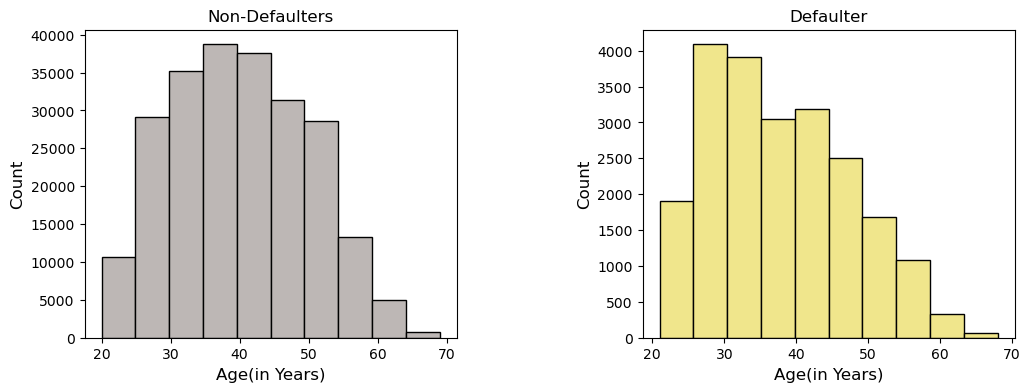

In [119]:
# UNIVARIATE ANALYSIS FOR DAYS_BIRTH COLUMN
create_hist(non_defaulter_data['DAYS_BIRTH'], defaulter_data['DAYS_BIRTH'], None, 'Age(in Years)', 'Count')

People between 25-40 years of age have the hightest loan application rate. what might be due to the following reasons:

-> Career and Financial Stability: Individuals aged 30-40 likely have established careers and financial stability, making them more confident in borrowing for significant investments such as housing or education.

-> Life Milestones: This age group often encounters significant life events such as marriage, children, or homeownership, necessitating financial assistance and leading to a higher loan application rate.

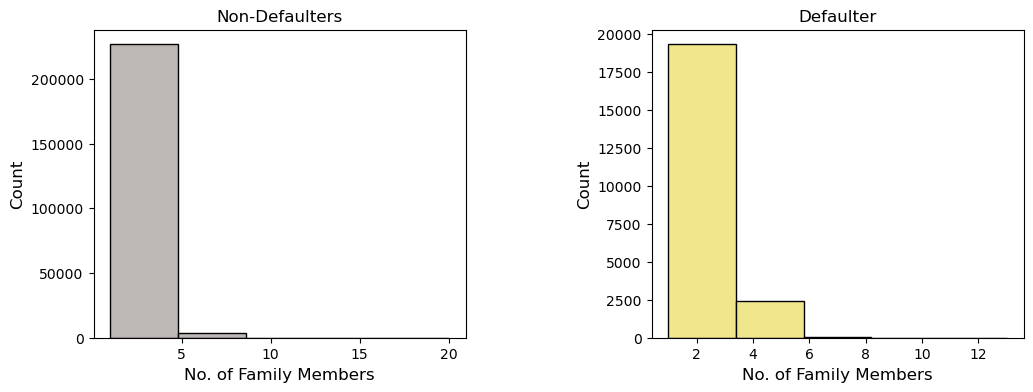

In [120]:
# UNIVARIATE ANALYSIS FOR CNT_FAM_MEMBERS COLUMN
create_hist(non_defaulter_data['CNT_FAM_MEMBERS'], defaulter_data['CNT_FAM_MEMBERS'], 5, 'No. of Family Members', 'Count')

In [121]:
100*application_data.groupby(['CODE_GENDER'])['TARGET'].mean()

CODE_GENDER
F     7.584781
M    10.443265
Name: TARGET, dtype: float64

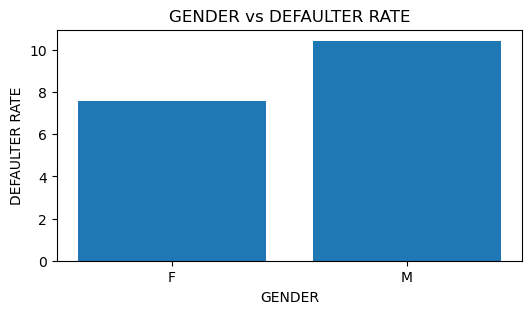

In [122]:
plt.figure(figsize = (6,3))
defaulter_rate_by_gender = dict(100*application_data.groupby(['CODE_GENDER'])['TARGET'].mean())
plt.bar(list(defaulter_rate_by_gender.keys()), list(defaulter_rate_by_gender.values()))
plt.title('GENDER vs DEFAULTER RATE')
plt.ylabel('DEFAULTER RATE')
plt.xlabel('GENDER')
plt.show()

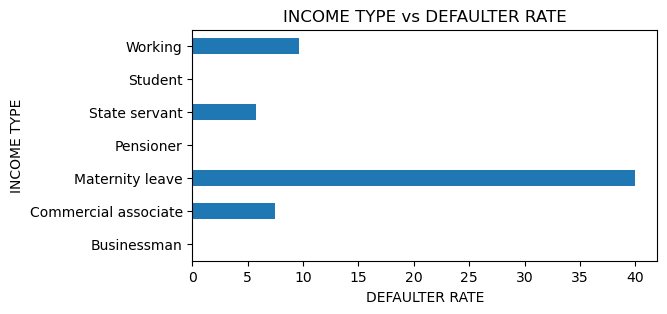

In [123]:
plt.figure(figsize=(6,3))

(100*application_data.groupby('NAME_INCOME_TYPE')['TARGET'].mean()).plot.barh()

plt.title('INCOME TYPE vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('INCOME TYPE')

plt.show()

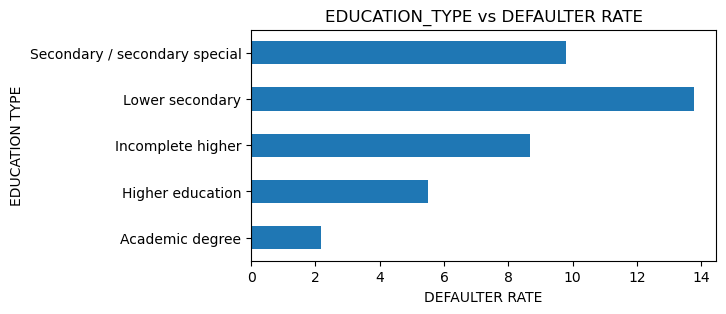

In [124]:
plt.figure(figsize=(6,3))

(100*application_data.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean()).plot.barh()

plt.title('EDUCATION_TYPE vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('EDUCATION TYPE')

plt.show()

While the highest loan application rate is for Secondary education, the default rate peaks for Lower Secondary. This suggests lower education levels may correlate with higher default rates, potentially due to lower income and financial constraints.

However, this assumption requires validation through analysis of income levels and loan credit amounts associated with different education types.

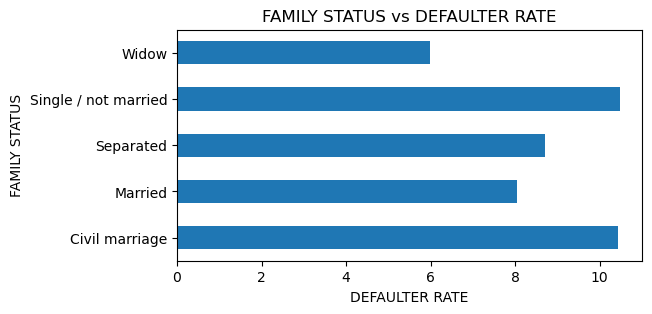

In [125]:
plt.figure(figsize=(6,3))

(100*application_data.groupby('NAME_FAMILY_STATUS')['TARGET'].mean()).plot.barh()

plt.title('FAMILY STATUS vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('FAMILY STATUS')

plt.show()

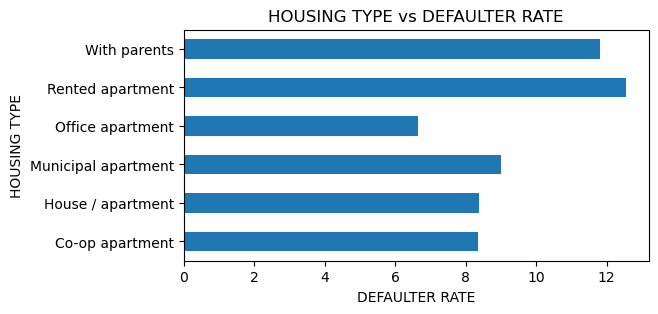

In [126]:
plt.figure(figsize=(6,3))

(100*application_data.groupby('NAME_HOUSING_TYPE')['TARGET'].mean()).plot.barh()

plt.title('HOUSING TYPE vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('HOUSING TYPE')

plt.show()

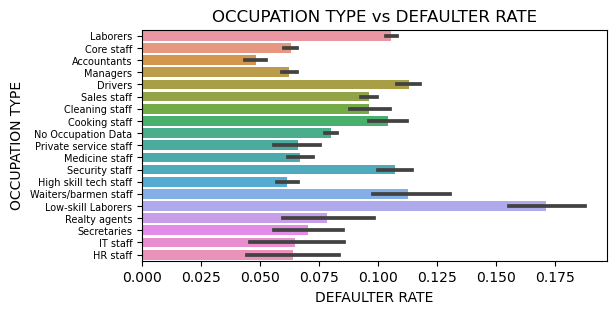

In [127]:
plt.figure(figsize=(6,3))

plot = sns.barplot(x = "TARGET", y = "OCCUPATION_TYPE", data = application_data)

plt.title('OCCUPATION TYPE vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('OCCUPATION TYPE')
plot.tick_params(axis='y', labelsize=7)

plt.show()

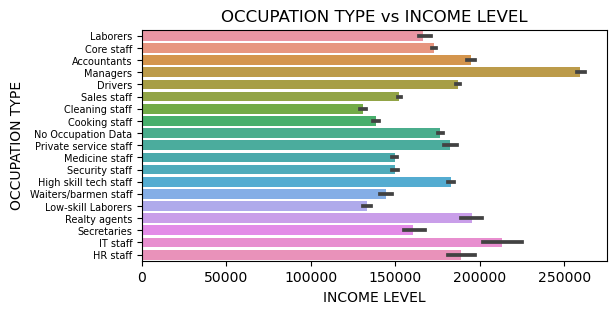

In [128]:
plt.figure(figsize=(6,3))

plot = sns.barplot(x = "AMT_INCOME_TOTAL", y = "OCCUPATION_TYPE", data = application_data)

plt.title('OCCUPATION TYPE vs INCOME LEVEL')
plt.xlabel('INCOME LEVEL')
plt.ylabel('OCCUPATION TYPE')
plot.tick_params(axis='y', labelsize=7)

plt.show()

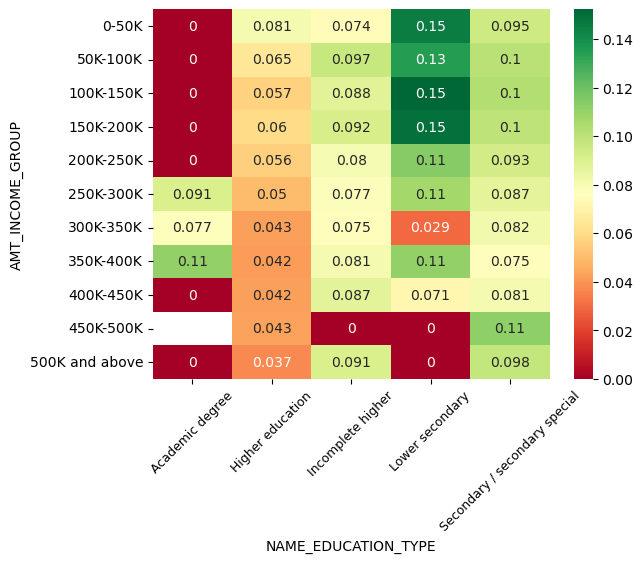

In [129]:
res = pd.pivot_table(data = application_data, index = 'AMT_INCOME_GROUP', columns = 'NAME_EDUCATION_TYPE', values = 'TARGET')
sns.heatmap(res, annot = True,cmap = 'RdYlGn')
plt.xticks(rotation = 45, fontsize = 9)
plt.show()

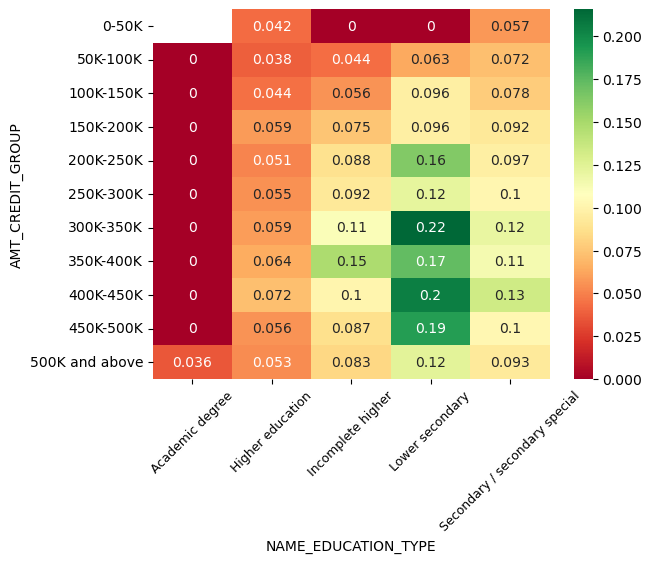

In [130]:
res = pd.pivot_table(data = application_data, index = 'AMT_CREDIT_GROUP', columns = 'NAME_EDUCATION_TYPE', values = 'TARGET')
sns.heatmap(res, annot = True,cmap = 'RdYlGn')
plt.xticks(rotation = 45, fontsize = 9)
plt.show()

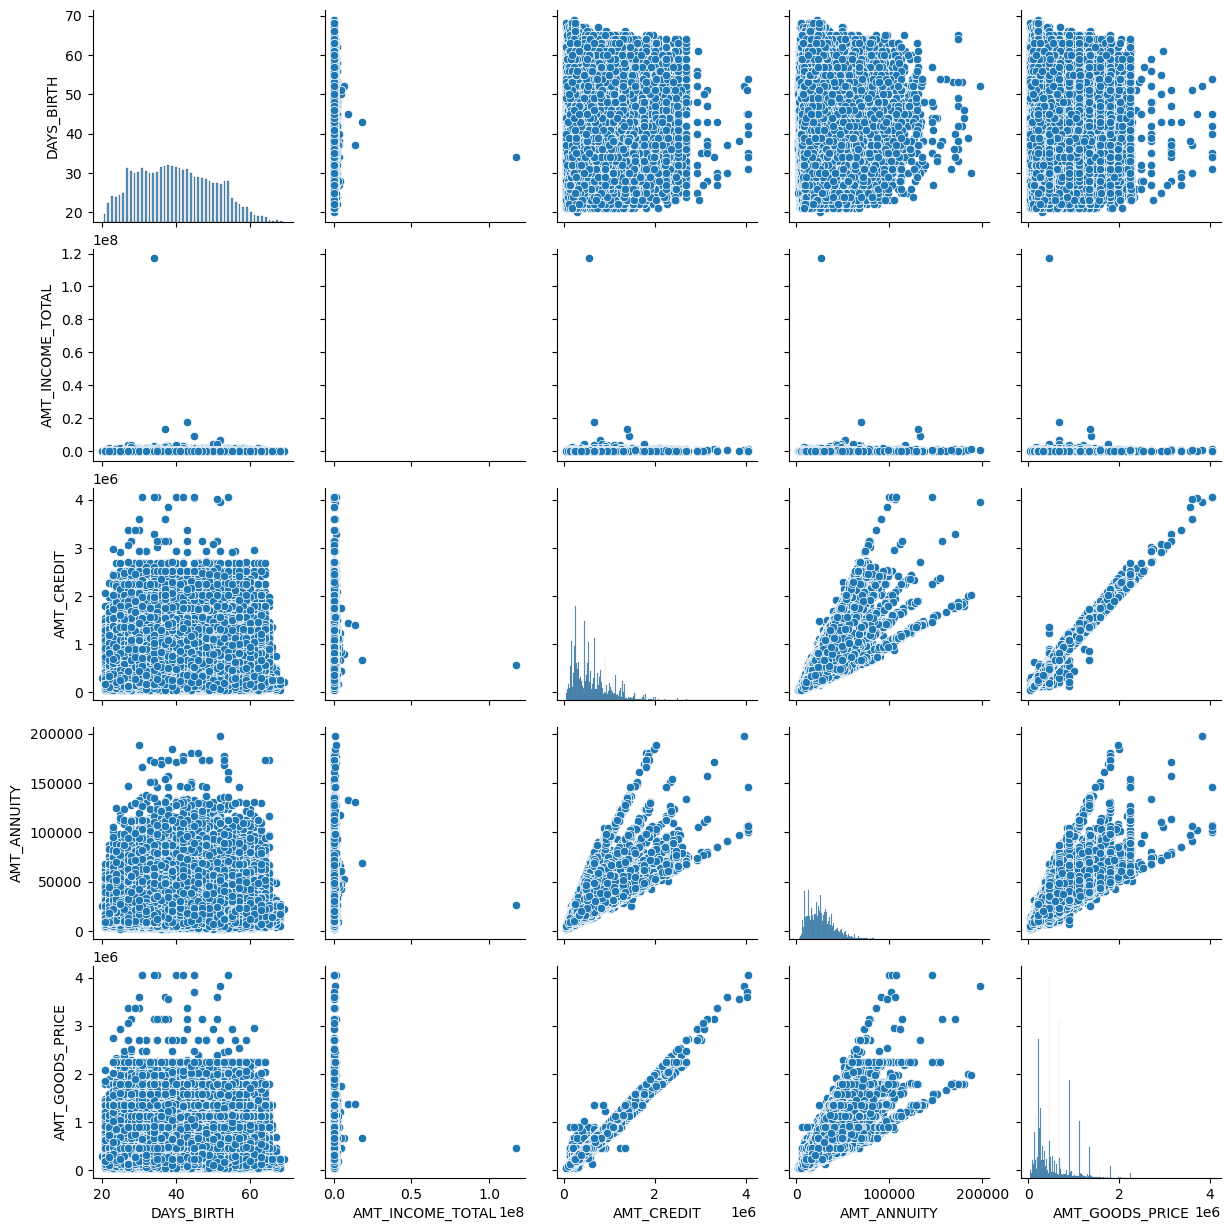

In [131]:
# Pair Plot for 'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'
sns.pairplot(data = application_data, vars = ['DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'])
plt.show()

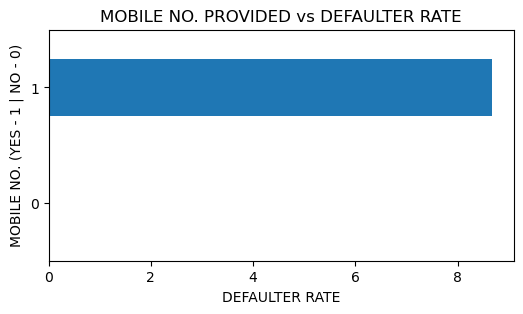

FLAG_MOBIL
0    0.000000
1    8.661211
Name: TARGET, dtype: float64


In [132]:
plt.figure(figsize=(6,3))

(100*application_data.groupby('FLAG_MOBIL')['TARGET'].mean()).plot.barh()

plt.title('MOBILE NO. PROVIDED vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('MOBILE NO. (YES - 1 | NO - 0)')

plt.show()

print(100*application_data.groupby('FLAG_MOBIL')['TARGET'].mean())

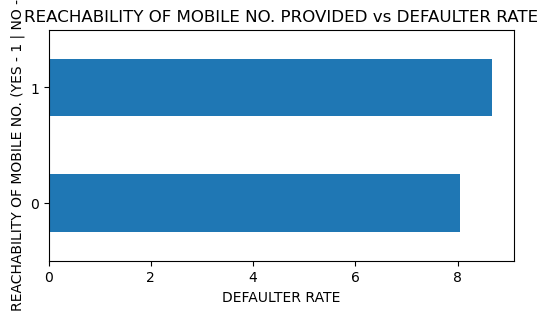

FLAG_CONT_MOBILE
0    8.037383
1    8.662503
Name: TARGET, dtype: float64


In [133]:
plt.figure(figsize=(6,3))

(100*application_data.groupby('FLAG_CONT_MOBILE')['TARGET'].mean()).plot.barh()

plt.title('REACHABILITY OF MOBILE NO. PROVIDED vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('REACHABILITY OF MOBILE NO. (YES - 1 | NO - 0)')

plt.show()

print(100*application_data.groupby('FLAG_CONT_MOBILE')['TARGET'].mean())

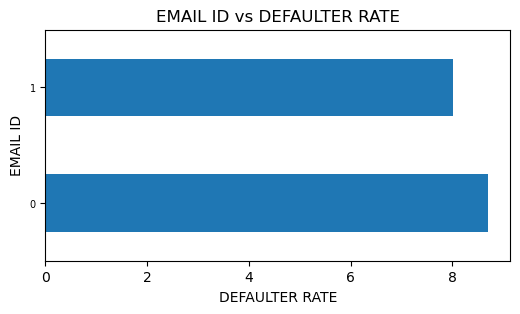

In [134]:
plt.figure(figsize=(6,3))

plot = (100*application_data.groupby('FLAG_EMAIL')['TARGET'].mean()).plot.barh()

plt.title('EMAIL ID vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('EMAIL ID')
plot.tick_params(axis='y', labelsize=7)
plt.show()

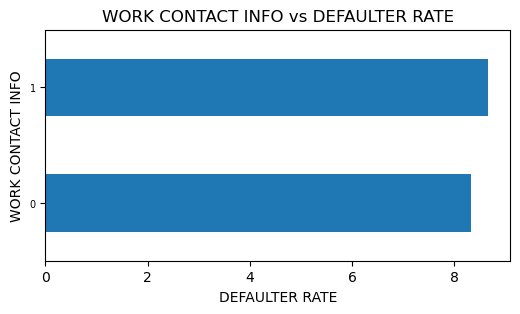

In [135]:
plt.figure(figsize=(6,3))

plot = (100*application_data.groupby('FLAG_EMP_PHONE')['TARGET'].mean()).plot.barh()

plt.title('WORK CONTACT INFO vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('WORK CONTACT INFO')
plot.tick_params(axis='y', labelsize=7)
plt.show()

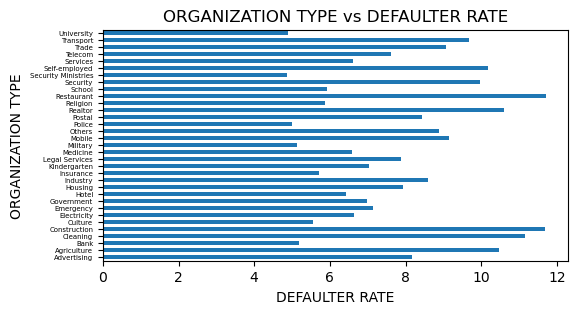

In [136]:
plt.figure(figsize = (6,3))

plot = (100*application_data.groupby('ORGANIZATION_TYPE')['TARGET'].mean()).plot.barh()

plt.title('ORGANIZATION TYPE vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('ORGANIZATION TYPE')
plot.tick_params(axis='y', labelsize=5)
plt.show()

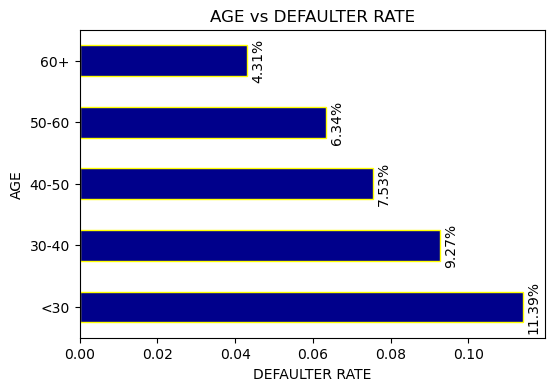

In [137]:
plt.figure(figsize = (6,4))

value_counts = application_data.groupby('AGE_GROUP')['TARGET'].mean()
ax = value_counts.plot.barh(color = 'darkblue', edgecolor = 'yellow')

plt.title('AGE vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('AGE')
plot.tick_params(axis='y', labelsize=8)

for i, v in enumerate(value_counts):
    ax.text(v + 0.001, i, f'{v*100:.2f}%', va='center', rotation=90)
plt.show()

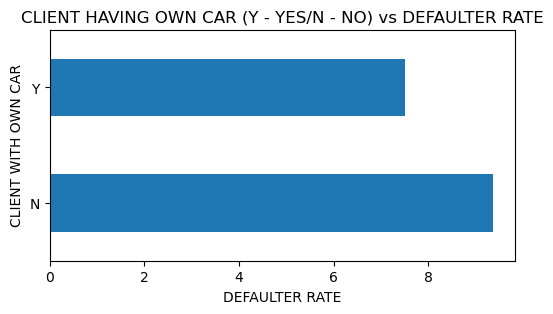

In [138]:
plt.figure(figsize = (6,3))

plot = (100*application_data.groupby('FLAG_OWN_CAR')['TARGET'].mean()).plot.barh()

plt.title('CLIENT HAVING OWN CAR (Y - YES/N - NO) vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('CLIENT WITH OWN CAR')
plt.show()

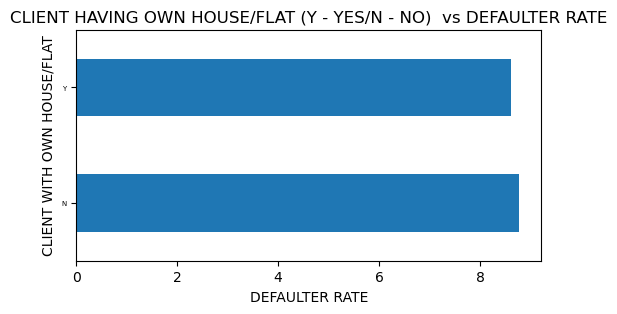

In [139]:
plt.figure(figsize = (6,3))

plot = (100*application_data.groupby('FLAG_OWN_REALTY')['TARGET'].mean()).plot.barh()

plt.title('CLIENT HAVING OWN HOUSE/FLAT (Y - YES/N - NO)  vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('CLIENT WITH OWN HOUSE/FLAT')
plot.tick_params(axis='y', labelsize=5)
plt.show()

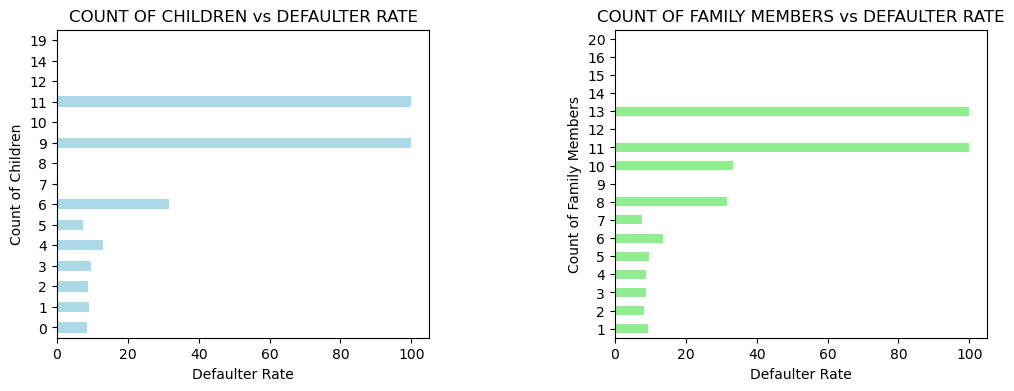

In [140]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
(100*application_data.groupby('CNT_CHILDREN')['TARGET'].mean()).plot.barh(color = 'lightblue')
plt.xlabel('Defaulter Rate', fontsize=10)
plt.ylabel('Count of Children', fontsize=10)
plt.title('COUNT OF CHILDREN vs DEFAULTER RATE')

plt.subplot(1, 2, 2)
(100*application_data.groupby('CNT_FAM_MEMBERS')['TARGET'].mean()).plot.barh(color = 'lightgreen')
plt.xlabel('Defaulter Rate', fontsize=10)
plt.ylabel('Count of Family Members', fontsize=10)
plt.title("COUNT OF FAMILY MEMBERS vs DEFAULTER RATE")

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10)
    
plt.subplots_adjust(wspace=0.5)
plt.show()

In [141]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
       'AMT_ANNUNITY', 'AMT_INCOME_GROUP', 'AMT_CREDIT_GROUP',
       'GOODS_PRICE_GROUP', 'AMT_ANNUITY_GROUP', 'AGE_GROUP'],
      dtype='object')

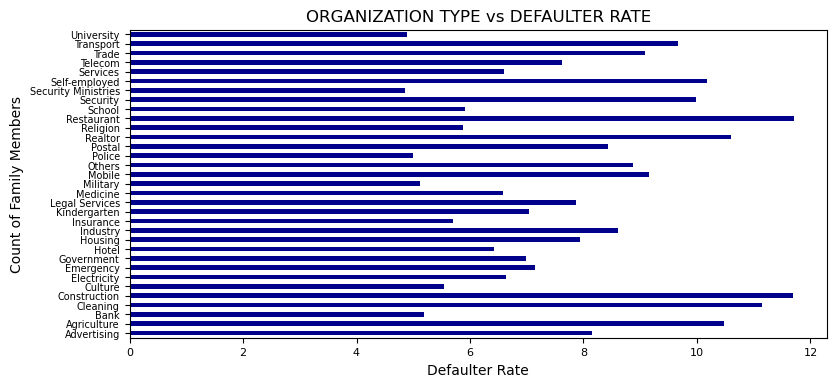

In [142]:
plt.figure(figsize=(9,4))
(100*application_data.groupby('ORGANIZATION_TYPE')['TARGET'].mean()).plot.barh(color = 'darkblue')
plt.xlabel('Defaulter Rate', fontsize=10)
plt.ylabel('Count of Family Members', fontsize=10)
plt.title("ORGANIZATION TYPE vs DEFAULTER RATE")

plt.xticks(fontsize = 8) 
plt.yticks(fontsize = 7)
plt.show()

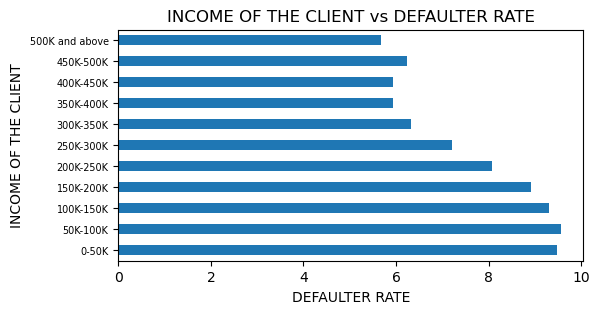

In [143]:
plt.figure(figsize=(6,3))

plot = (100*application_data.groupby('AMT_INCOME_GROUP')['TARGET'].mean()).plot.barh()

plt.title('INCOME OF THE CLIENT vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('INCOME OF THE CLIENT')
plot.tick_params(axis='y', labelsize=7)
plt.show()

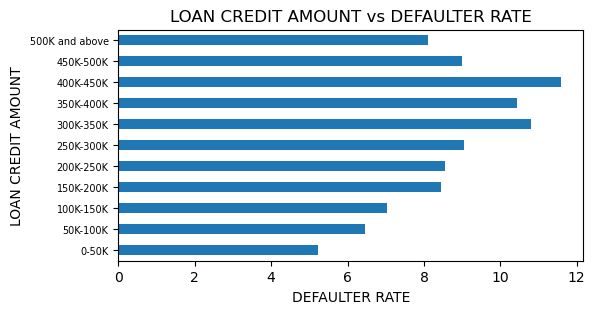

In [144]:
plt.figure(figsize=(6,3))

plot = (100*application_data.groupby('AMT_CREDIT_GROUP')['TARGET'].mean()).plot.barh()

plt.title('LOAN CREDIT AMOUNT vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('LOAN CREDIT AMOUNT')
plot.tick_params(axis='y', labelsize=7)
plt.show()

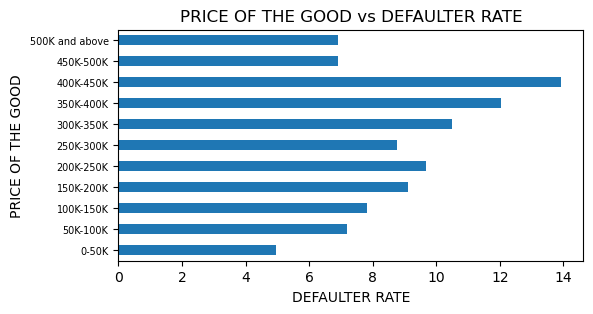

In [145]:
plt.figure(figsize=(6,3))

plot = (100*application_data.groupby('GOODS_PRICE_GROUP')['TARGET'].mean()).plot.barh()

plt.title('PRICE OF THE GOOD vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('PRICE OF THE GOOD')
plot.tick_params(axis='y', labelsize=7)
plt.show()

In [146]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
       'AMT_ANNUNITY', 'AMT_INCOME_GROUP', 'AMT_CREDIT_GROUP',
       'GOODS_PRICE_GROUP', 'AMT_ANNUITY_GROUP', 'AGE_GROUP'],
      dtype='object')

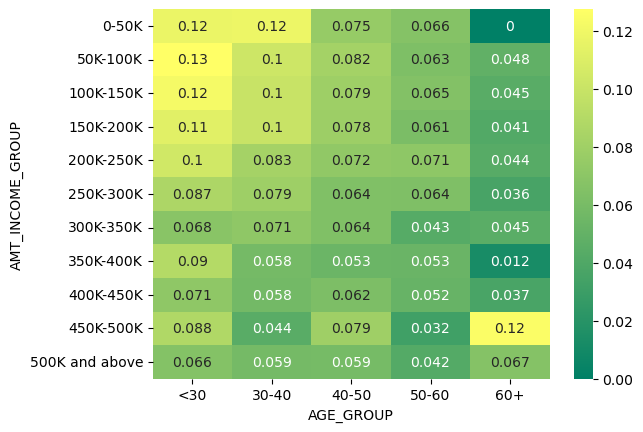

In [147]:
#CORRELATION BETWEEN DAYS_BIRTH, AMT_INCOME_GROUP, TARGET

res = pd.pivot_table(data = application_data, index = 'AMT_INCOME_GROUP', columns = 'AGE_GROUP', values = 'TARGET')
res

sns.heatmap(res, annot = True, cmap = 'summer')
plt.show()

MERGING OF previous_application DATASET WITH application_data

In [148]:
merged_data = pd.merge(application_data, previous_application, how='inner', on='SK_ID_CURR', suffixes=('_Curr', '_Prev'))

In [149]:
merged_data.shape

(887636, 76)

In [150]:
merged_data.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE_Curr             0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT_Curr                     0
AMT_ANNUITY_Curr                    0
AMT_GOODS_PRICE_Curr                0
NAME_TYPE_SUITE_Curr                0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

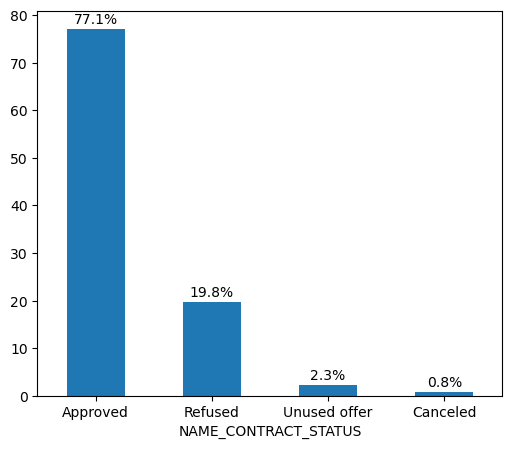

In [151]:
plt.figure(figsize=(6,5))

val = (merged_data.NAME_CONTRACT_STATUS.value_counts() / len(merged_data)) * 100

ax = val.plot.bar()

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, f'{i.get_height():.1f}%', ha='center', va='bottom')

plt.xticks(rotation = None)
plt.show()

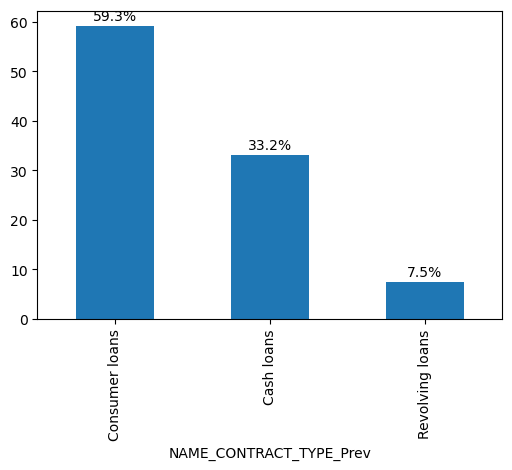

In [152]:
plt.figure(figsize=(6,4))

val = (merged_data.NAME_CONTRACT_TYPE_Prev.value_counts() / len(merged_data)) * 100

ax = val.plot.bar()

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, f'{i.get_height():.1f}%', ha='center', va='bottom')

plt.show()

In [153]:
merged_data.NAME_GOODS_CATEGORY.value_counts()

NAME_GOODS_CATEGORY
XNA                         367778
Mobile                      172797
Consumer Electronics         81065
Computers                    79857
Audio/Video                  71808
Furniture                    34959
Photo / Cinema Equipment     19610
Clothing and Accessories     16580
Construction Materials       15214
Auto Accessories              5752
Jewelry                       4498
Homewares                     2979
Vehicles                      2355
Sport and Leisure             2145
Medical Supplies              2079
Other                         1814
Gardening                     1763
Office Appliances             1740
Tourism                       1210
Medicine                      1009
Direct Sales                   194
Fitness                        159
Education                       84
Additional Service              74
Weapon                          61
Insurance                       51
Animals                          1
Name: count, dtype: int64

In [154]:
# Drop all the 'XNA' values
merged_data = merged_data[merged_data['NAME_GOODS_CATEGORY'] != 'XNA']

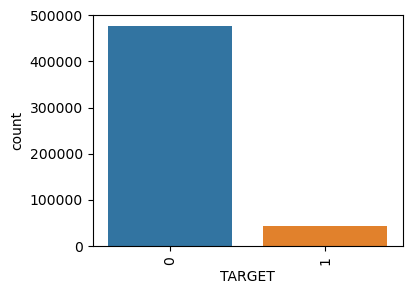

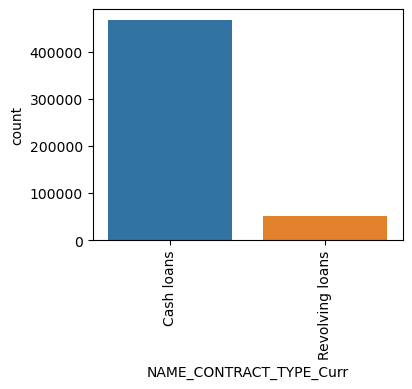

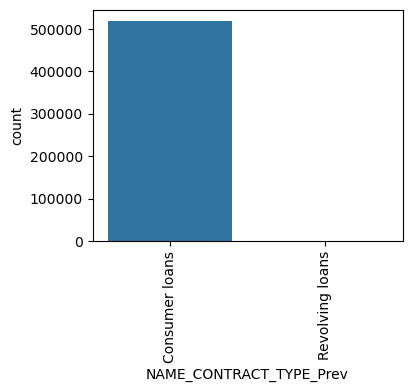

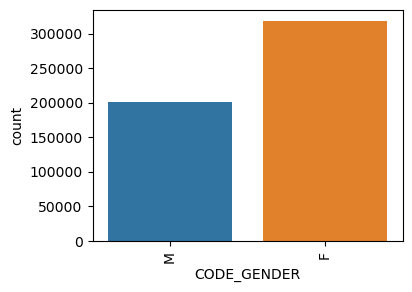

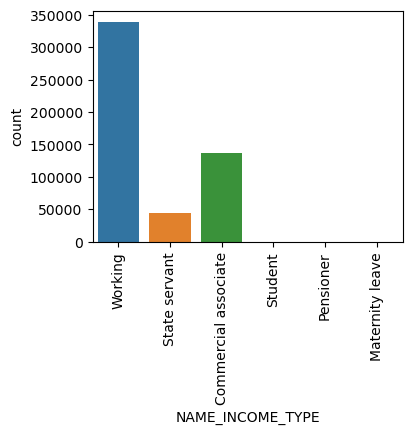

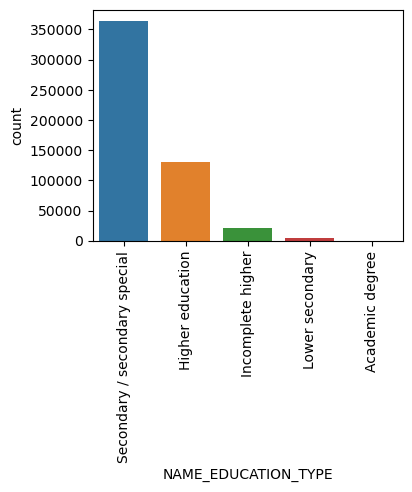

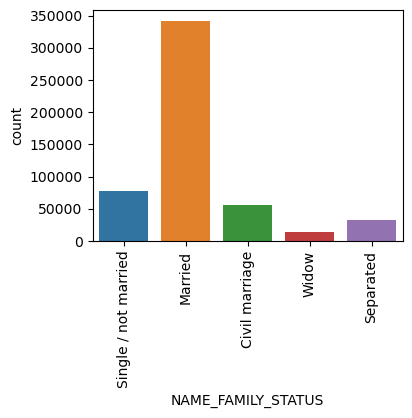

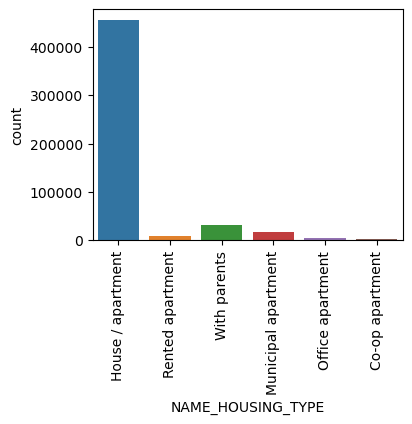

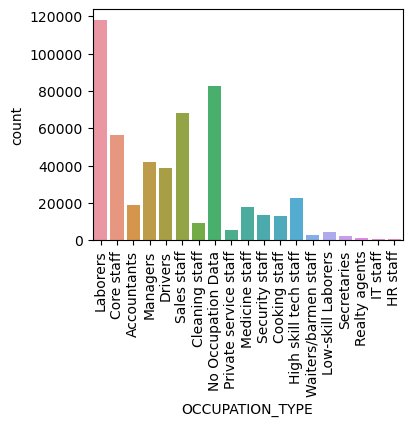

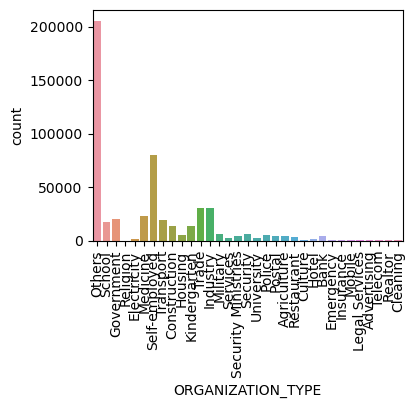

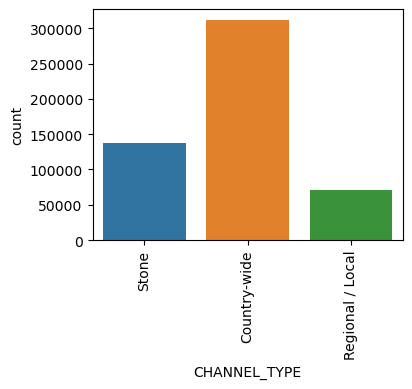

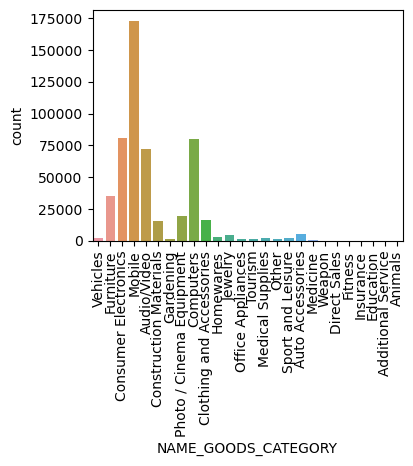

In [155]:
cat_cols =['TARGET', 'NAME_CONTRACT_TYPE_Curr','NAME_CONTRACT_TYPE_Prev','CODE_GENDER','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
           'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE','ORGANIZATION_TYPE', 
           'CHANNEL_TYPE', 'NAME_GOODS_CATEGORY']

        
def cat_column(col):
    plt.figure(figsize=(4,3))
    ax = sns.countplot(x = col, data = merged_data)
    ax.set(xlabel = col)
    plt.xticks(rotation = 90)
    
for i in cat_cols:
    cat_column(i)

In [156]:
#Creating the buckets of <30, 30-40, 40-50, 50-60, 60+ for Age of the Client.
merged_data['AGE_GROUP'] = pd.cut(merged_data.DAYS_BIRTH, [0, 30, 40, 50, 60, 9999], labels = ['<30', '30-40', '40-50', '50-60','60+'])
merged_data['AGE_GROUP'].value_counts(normalize = True)

AGE_GROUP
30-40    0.346681
40-50    0.277499
<30      0.229195
50-60    0.131459
60+      0.015166
Name: proportion, dtype: float64

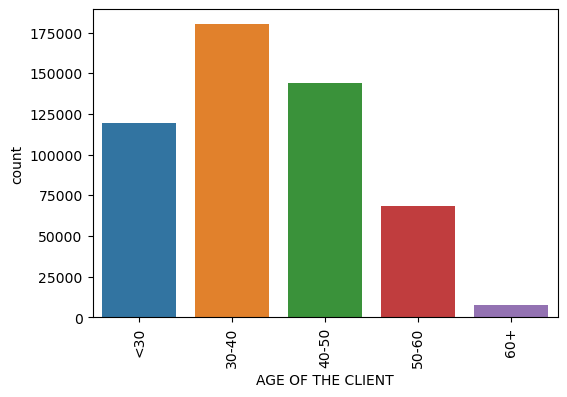

In [157]:
# UNIVARIATE ANALYSIS OF AGE OF THE CLIENT:

plt.figure(figsize=(6,4))
ax = sns.countplot(x = 'AGE_GROUP', data = merged_data)
ax.set(xlabel = 'AGE OF THE CLIENT')
plt.xticks(rotation = 90)
plt.show()

In [158]:
# HANDLING THE OUTLIERS IN THE BELOW NUMERICAL COLUMN
num_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT_Curr', 'AMT_CREDIT_Prev', 'AMT_ANNUITY_Curr',
            'AMT_ANNUITY_Prev', 'AMT_GOODS_PRICE_Curr', 'AMT_GOODS_PRICE_Prev']

for i in num_cols:
    
    q1 = merged_data[i].describe()['25%']
    q3 = merged_data[i].describe()['75%']
    IQR = q3 - q1
    
    upper_bound = q3 + 1.5 * IQR
    lower_bound = q1 - 1.5 * IQR
    
    merged_data[i] = np.where(merged_data[i] > upper_bound, upper_bound, merged_data[i])
    merged_data[i] = np.where(merged_data[i] < lower_bound, lower_bound, merged_data[i])

In [159]:
merged_data[['AMT_INCOME_TOTAL', 'AMT_CREDIT_Curr', 'AMT_CREDIT_Prev', 'AMT_ANNUITY_Curr',
            'AMT_ANNUITY_Prev', 'AMT_GOODS_PRICE_Curr', 'AMT_GOODS_PRICE_Prev']].dtypes

AMT_INCOME_TOTAL        float64
AMT_CREDIT_Curr         float64
AMT_CREDIT_Prev         float64
AMT_ANNUITY_Curr        float64
AMT_ANNUITY_Prev        float64
AMT_GOODS_PRICE_Curr    float64
AMT_GOODS_PRICE_Prev    float64
dtype: object

In [160]:
merged_data[['AMT_INCOME_TOTAL', 'AMT_CREDIT_Curr', 'AMT_CREDIT_Prev', 'AMT_ANNUITY_Curr',
            'AMT_ANNUITY_Prev', 'AMT_GOODS_PRICE_Curr', 'AMT_GOODS_PRICE_Prev']].isnull().sum()

AMT_INCOME_TOTAL            0
AMT_CREDIT_Curr             0
AMT_CREDIT_Prev             0
AMT_ANNUITY_Curr            0
AMT_ANNUITY_Prev        28407
AMT_GOODS_PRICE_Curr        0
AMT_GOODS_PRICE_Prev        0
dtype: int64

In [161]:
# Drop the null values in AMT_ANNUITY_Prev column
merged_data.dropna(subset=['AMT_ANNUITY_Prev'], inplace=True)

In [162]:
# Converting the above columns into integer for better analysis
columns_to_convert = ['AMT_INCOME_TOTAL', 'AMT_CREDIT_Curr', 'AMT_CREDIT_Prev', 'AMT_ANNUITY_Curr',
                     'AMT_ANNUITY_Prev', 'AMT_GOODS_PRICE_Curr', 'AMT_GOODS_PRICE_Prev']

for column in columns_to_convert:
    merged_data[column] = merged_data[column].astype(int)

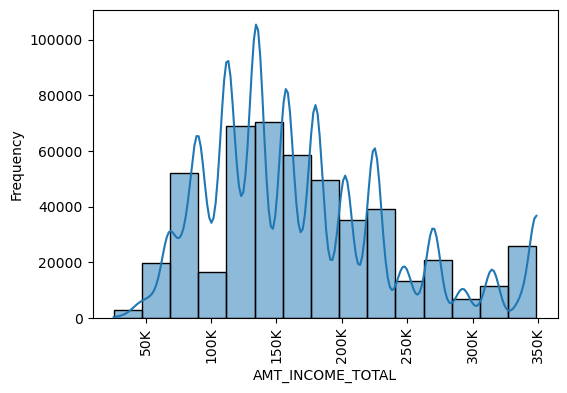

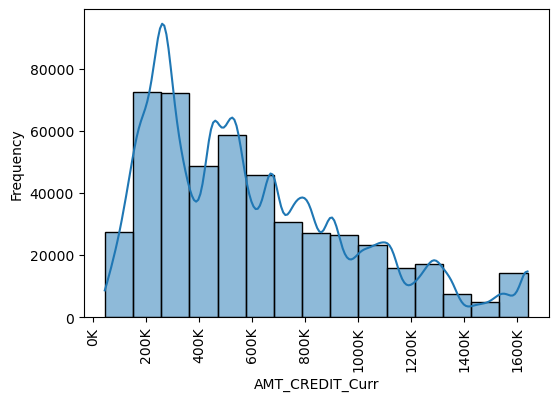

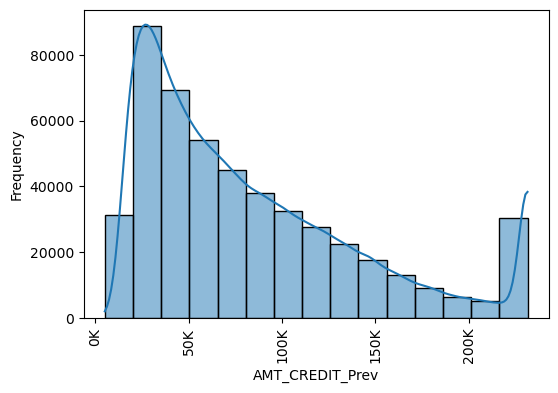

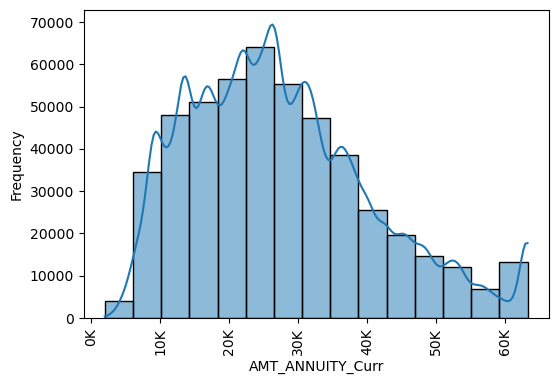

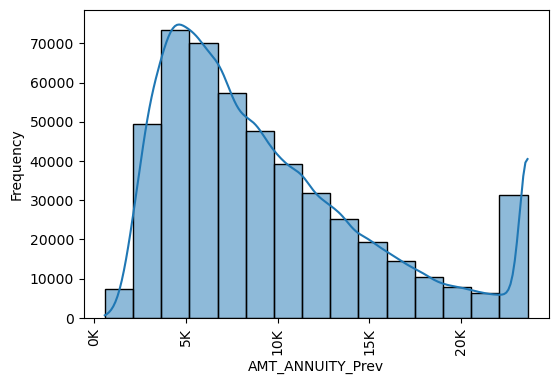

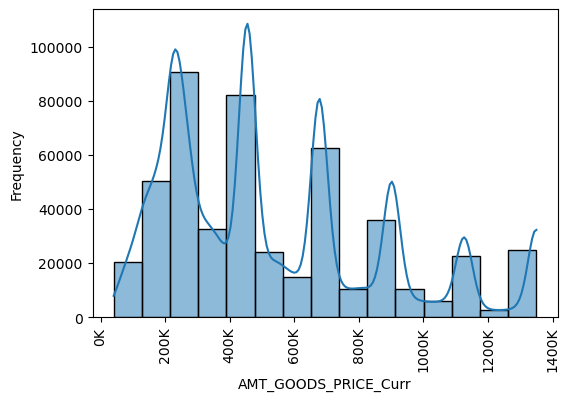

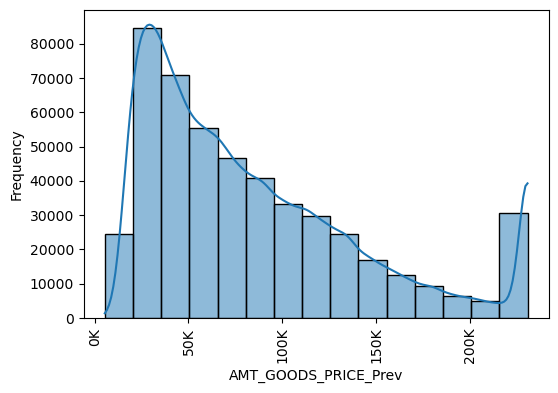

In [163]:
num_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT_Curr', 'AMT_CREDIT_Prev', 'AMT_ANNUITY_Curr',
            'AMT_ANNUITY_Prev', 'AMT_GOODS_PRICE_Curr', 'AMT_GOODS_PRICE_Prev']

def num_column(col):
    plt.figure(figsize=(6,4))
    ax = sns.histplot(x=col, data=merged_data, bins=15, kde=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.set_xticklabels(['{:.0f}K'.format(x/1000) for x in ax.get_xticks()])
    plt.xticks(rotation=90)
    plt.show()

for col in num_cols:
    num_column(col)

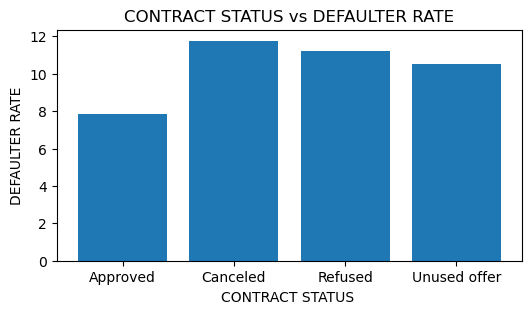

In [164]:
# BIVARIATE ANAYLSIS OF NAME_CONTRACT_STATUS vs TARGET

plt.figure(figsize = (6,3))
defaulter_rate_by_contract_status = dict(100*merged_data.groupby(['NAME_CONTRACT_STATUS'])['TARGET'].mean())
plt.bar(list(defaulter_rate_by_contract_status.keys()), list(defaulter_rate_by_contract_status.values()))
plt.title('CONTRACT STATUS vs DEFAULTER RATE')
plt.ylabel('DEFAULTER RATE')
plt.xlabel('CONTRACT STATUS ')
plt.show()

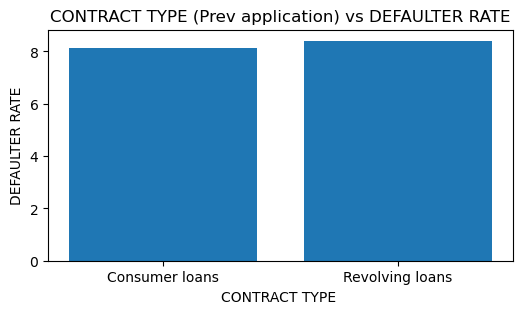

In [165]:
# BIVARIATE ANAYLSIS OF NAME_CONTRACT_TYPE_Prev vs TARGET

plt.figure(figsize = (6,3))
defaulter_rate_by_contract_type = dict(100*merged_data.groupby(['NAME_CONTRACT_TYPE_Prev'])['TARGET'].mean())
plt.bar(list(defaulter_rate_by_contract_type.keys()), list(defaulter_rate_by_contract_type.values()))
plt.title('CONTRACT TYPE (Prev application) vs DEFAULTER RATE')
plt.ylabel('DEFAULTER RATE')
plt.xlabel('CONTRACT TYPE ')
plt.show()

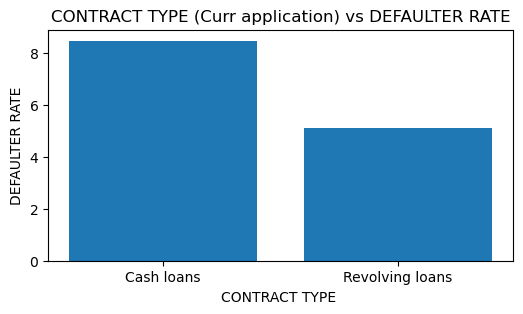

In [166]:
# BIVARIATE ANAYLSIS OF NAME_CONTRACT_TYPE_Curr vs TARGET

plt.figure(figsize = (6,3))
defaulter_rate_by_contract_type = dict(100*merged_data.groupby(['NAME_CONTRACT_TYPE_Curr'])['TARGET'].mean())
plt.bar(list(defaulter_rate_by_contract_type.keys()), list(defaulter_rate_by_contract_type.values()))
plt.title('CONTRACT TYPE (Curr application) vs DEFAULTER RATE')
plt.ylabel('DEFAULTER RATE')
plt.xlabel('CONTRACT TYPE ')
plt.show()

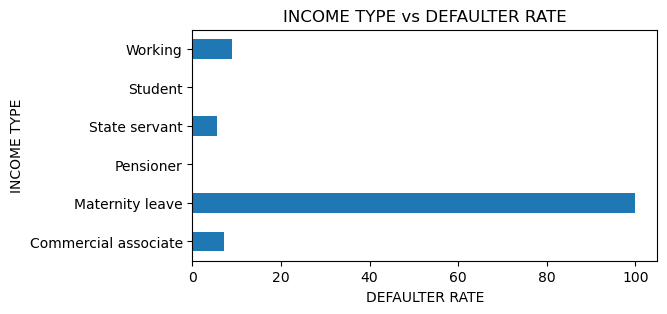

In [167]:
# BIVARIATE ANAYLSIS OF NAME_INCOME_TYPE vs TARGET
plt.figure(figsize=(6,3))

(100*merged_data.groupby('NAME_INCOME_TYPE')['TARGET'].mean()).plot.barh()

plt.title('INCOME TYPE vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('INCOME TYPE')

plt.show()

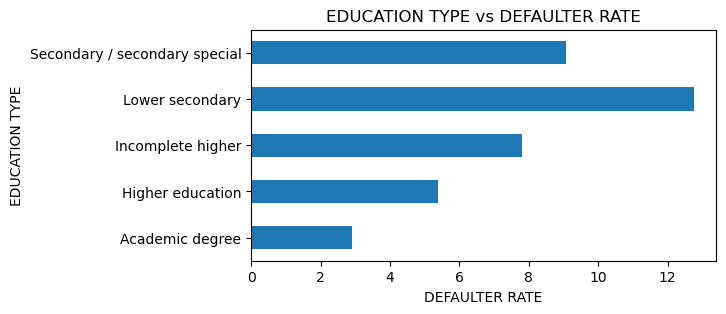

In [168]:
# BIVARIATE ANAYLSIS OF NAME_EDUCATION_TYPE vs TARGET
plt.figure(figsize=(6,3))

(100*merged_data.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean()).plot.barh()

plt.title('EDUCATION TYPE vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('EDUCATION TYPE')

plt.show()

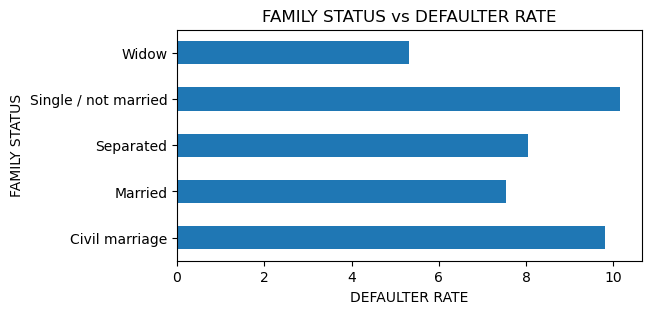

In [169]:
# BIVARIATE ANAYLSIS OF NAME_FAMILY_STATUS vs TARGET
plt.figure(figsize=(6,3))

(100*merged_data.groupby('NAME_FAMILY_STATUS')['TARGET'].mean()).plot.barh()

plt.title('FAMILY STATUS vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('FAMILY STATUS')

plt.show()

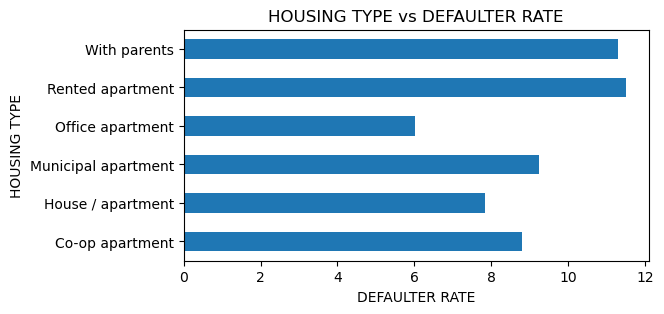

In [170]:
# BIVARIATE ANAYLSIS OF NAME_HOUSING_TYPE  vs TARGET
plt.figure(figsize=(6,3))

(100*merged_data.groupby('NAME_HOUSING_TYPE')['TARGET'].mean()).plot.barh()

plt.title('HOUSING TYPE vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('HOUSING TYPE')

plt.show()

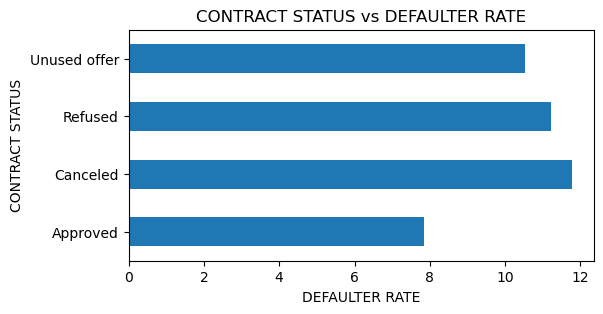

In [171]:
# BIVARIATE ANAYLSIS OF NAME_CONTRACT_STATUS  vs TARGET
plt.figure(figsize=(6,3))

(100*merged_data.groupby('NAME_CONTRACT_STATUS')['TARGET'].mean()).plot.barh()

plt.title('CONTRACT STATUS vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('CONTRACT STATUS')

plt.show()

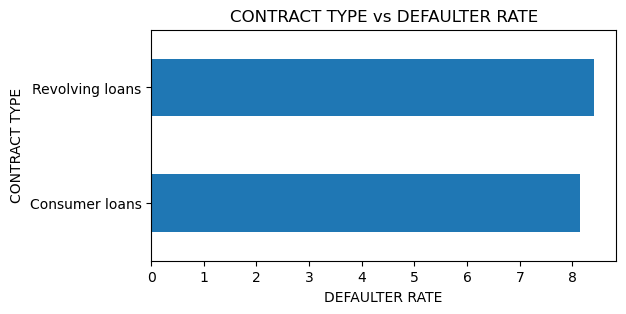

In [172]:
# BIVARIATE ANAYLSIS OF NAME_CONTRACT_TYPE vs TARGET
plt.figure(figsize=(6,3))

(100*merged_data.groupby('NAME_CONTRACT_TYPE_Prev')['TARGET'].mean()).plot.barh()

plt.title('CONTRACT TYPE vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('CONTRACT TYPE')

plt.show()

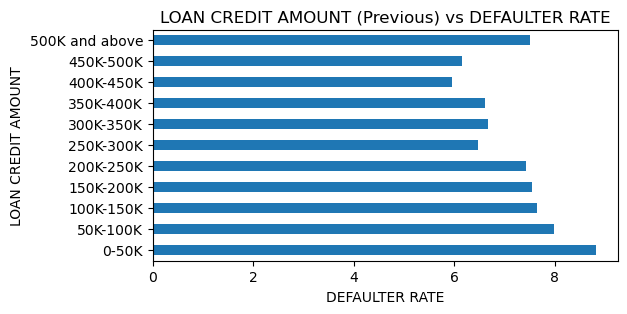

In [173]:
# BIVARIATE ANAYLSIS OF AMT_CREDIT_GROUP_Prev vs TARGET
plt.figure(figsize=(6,3))

(100*merged_data.groupby('AMT_CREDIT_GROUP_Prev')['TARGET'].mean()).plot.barh()

plt.title('LOAN CREDIT AMOUNT (Previous) vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('LOAN CREDIT AMOUNT')

plt.show()

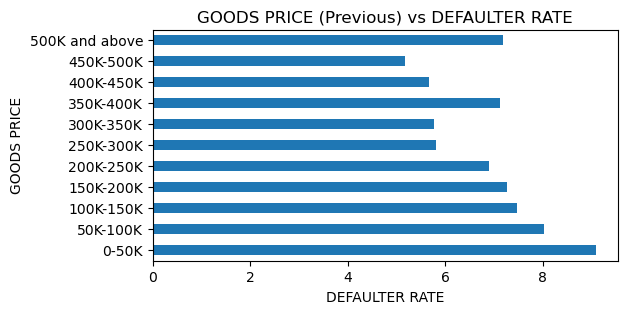

In [174]:
# BIVARIATE ANAYLSIS OF GOODS_PRICE_GROUP_Prev vs TARGET
plt.figure(figsize=(6,3))

(100*merged_data.groupby('GOODS_PRICE_GROUP_Prev')['TARGET'].mean()).plot.barh()

plt.title('GOODS PRICE (Previous) vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('GOODS PRICE')

plt.show()

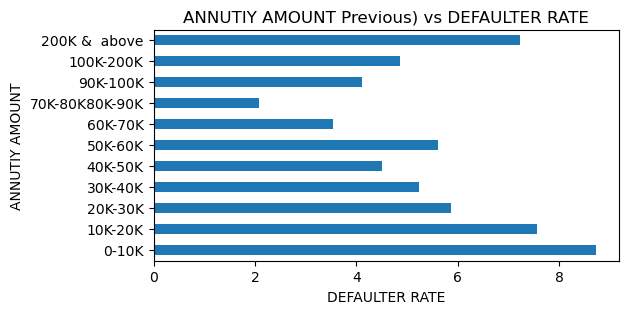

In [175]:
# BIVARIATE ANAYLSIS OF AMT_ANNUITY_GROUP_Prev vs TARGET
plt.figure(figsize=(6,3))

(100*merged_data.groupby('AMT_ANNUITY_GROUP_Prev')['TARGET'].mean()).plot.barh()

plt.title('ANNUTIY AMOUNT Previous) vs DEFAULTER RATE')
plt.xlabel('DEFAULTER RATE')
plt.ylabel('ANNUTIY AMOUNT')

plt.show()

In [176]:
merged_data['AMT_APPLICATION'].isnull().sum()

0

In [177]:
merged_data['AMT_APPLICATION'].dtypes

dtype('int32')

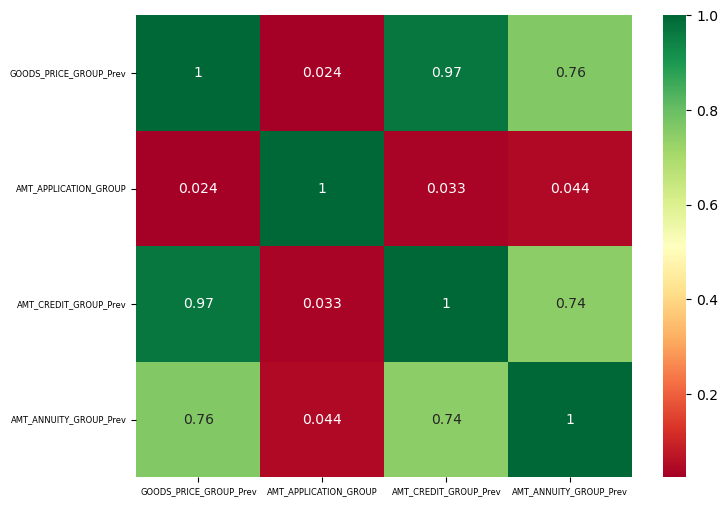

In [178]:
merged_data['GOODS_PRICE_GROUP_Prev'] = merged_data['GOODS_PRICE_GROUP_Prev'].astype('category').cat.codes
merged_data['AMT_APPLICATION_GROUP'] = merged_data['AMT_APPLICATION_GROUP'].astype('category').cat.codes
merged_data['AMT_CREDIT_GROUP_Prev'] = merged_data['AMT_CREDIT_GROUP_Prev'].astype('category').cat.codes
merged_data['AMT_ANNUITY_GROUP_Prev'] = merged_data['AMT_ANNUITY_GROUP_Prev'].astype('category').cat.codes

corr = merged_data[['GOODS_PRICE_GROUP_Prev', 'AMT_APPLICATION_GROUP', 'AMT_CREDIT_GROUP_Prev', 'AMT_ANNUITY_GROUP_Prev']].corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.xticks(fontsize = 6, rotation = None)
plt.yticks(fontsize = 6, rotation = None)
plt.show()

# FINAL INSIGHTS DERIVED OUT OF THE ANALYSIS

1. The gender of the client is one of the driving factors behind defaulting. The chances of a male being a defaulter are higher than those of a female.

2. In the income type of the client, the chances of defaulting are higher for women in MAT cases. The company can provide loans to working professionals and commercial associates as their chances of defaulting are lower, provided they have the highest loan application rate.

3. Clients who have just completed their lower secondary education have the highest chance of defaulting. Hence, the company can focus more on people who have completed their higher education and obtained academic degrees.

4. Clients whose marital status is 'Single' or 'Civil Marriage' have the highest chance of defaulting. Hence, the company can focus more on the Married/Widow category as they have a lower chance of defaulting.

5. Clients residing in rental accommodation or with parents have defaulted the most. Hence, the company can focus more on providing loans to clients who own their own accommodation or stay in office or cooperative accommodation.

6. Low-skilled laborers have the highest chance of defaulting as they have the lowest salary level, making it difficult for them to repay the loan. Hence, the company should be more careful when lending to them.

7. Accountants, managers, and high-skilled technologists have the lowest chance of defaulting, and their salaries are in the higher range. Hence, the bank should focus on providing loans to them for maximum profitability.

8. Clients below 30 years of age have the highest chance of defaulting, whereas clients above 60 years of age have the lowest chance of defaulting, but clients in that age group do not apply for loans much. So, the company should focus on the age group 30-50 years old for lending to maximize profitability.

9. The higher the number of children, the higher the count of family members, and the higher the chance of defaulting. The default rate is higher for clients in the lower income range, indicating that the higher the salary, the lower the chance of defaulting.

10. People taking cash loans have a higher chance of defaulting.

11. Clients who do not own their own car have defaulted the most, possibly assuming that having a car indicates luxury, which means the client has enough wealth to maintain a lifestyle. Hence, payment of the loan is not as difficult for clients who have their own car.

12. The higher the price of the good, the higher the loan amount credited, and the higher the installment amount. These three factors are highly correlated.

13. The loan application rate is lowest for clients who do not own a house/flat, but the default rate is slightly higher for them, which can be a driving factor to consider when providing loans.